# Image Classification and Clustering

In [ ]:
!gdown 1cj3NBSXE3EHgc0L54xhAvH_AdNVeFuZs
!gdown 1iWq0DEv_SrB947O9z2klKKneYrYHSCqL
!unzip BT1BigByLetters20220128CLEANED.zip
!unzip LREC2022_image_characters.zip
!rm -R __MACOSX

Since the link for `BT1BigByLetters20220128CLEANED.zip` file stopped working we uploaded it to our personal google drive and imported it using the following code:

In [ ]:
%%capture
from google.colab import drive
drive.mount('/content/drive')
!unzip "/content/drive/MyDrive/BT1BigByLetters20220128CLEANED.zip"
!rm -R __MACOSX
drive.flush_and_unmount()

Before we begin with the project we need to upgrade the `matplotlib` package in order to have access to some of the newest features that this package has to offer. We do this now because the runtime **will** need to be restarted before we can use the upgraded package, and since we haven't actually started the project yet it makes sense to do this now, because at any point beyond this, all our data will be lost.

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 28.1 MB/s 
     |████████████████████████████████| 965 kB 59.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


You are provided two image datasets, comprising optical characters. The first is `LREC2022_image_characters` and the second is `BT1BigByLetters20220128CLEANED`. 

```
WARNING: Any seed (e.g., `random_state` to split, etc.) should be set to 39. 
```

# Part 1
* Use the cell below to load the unziped images (28*28 pixels) in grayscale of two datasets. Code to assist you with saving the first as a DataFrame is provided below. 
* You are also provided an Excel file that comprises the name of each image of the `LREC2022_image_characters` dataset along with the respective character and the century of the document the image is taken from. 
* Merge the columns of the filename, the century and the character with the dataframe of the `LREC2022_image_characters` dataset. 
* The name of each image of the `BT1BigByLetters20220128CLEANED` dataset comprises important information encoded in the name. For example, the name `ϲ_60701_bt1_Iliad.11.40.17.png` has two parts in the beginning, the character (c) which you already know and `60701`, which you want to store separately. Create a new column named `TM` at the dataframe of this dataset that will hold this information. 
* Add a new column in each dataframe that will hold the image flattened (one vector per image) and normalised (values should be between 0 and 1).
* Show a sample line per dataset to showcase that you have done all the above steps.
* Visualise some images.

In [ ]:
# loading the lrec images into a dataframe
from tqdm.notebook import tqdm
import os
import pandas as pd
import cv2

H, W = 28, 28
GRAY = True

def image_read(path, h=H, w=W, color=cv2.COLOR_BGR2GRAY):
    try:
        img = cv2.imread(path)
        img = cv2.resize(img, (h, w))
        img = cv2.cvtColor(img, color)
    except:
        print(f"WARNING: Excluding '{path}'...")
    return img

We will now use the code provided to create a dataframe that will hold the name of each image that is featured in the `LREC2022_image_characters` zip file, which when unzipped created the folder `image_characters`, the image itself (as a matrix), and a flattened vector of this matrix.

In [ ]:
root = "/content/image_characters" # change this name to parse the other dataset
names, images = [], []
for img_path in tqdm(os.listdir(root)):
    img = image_read(f"{root}/{img_path}")
    images.append(img)
    names.append(img_path)

ds1 = pd.DataFrame({"name":names, "img":images})
ds1["flatten"] = ds1.img.apply(lambda img: img.reshape(H*W).flatten()) # flattening

  0%|          | 0/2293 [00:00<?, ?it/s]

In [ ]:
ds1.head()

,name,img,flatten
0,8.14.23.png,"[[221, 221, 222, 220, 220, 219, 219, 220, 222,...","[221, 221, 222, 220, 220, 219, 219, 220, 222, ..."
1,83.16.30.png,"[[206, 208, 212, 213, 209, 205, 204, 204, 205,...","[206, 208, 212, 213, 209, 205, 204, 204, 205, ..."
2,68.9.27.png,"[[221, 220, 219, 218, 218, 218, 218, 216, 216,...","[221, 220, 219, 218, 218, 218, 218, 216, 216, ..."
3,42.8.33.png,"[[193, 196, 199, 203, 204, 205, 204, 203, 202,...","[193, 196, 199, 203, 204, 205, 204, 203, 202, ..."
4,92.8.27.png,"[[218, 220, 222, 224, 225, 224, 224, 221, 220,...","[218, 220, 222, 224, 225, 224, 224, 221, 220, ..."


We now want to create a similar dataframe for the `BT1BigByLetters20220128CLEANED` dataset. But, when unzipped, this file has several subfolders, along with a hidden one, named `.DS_Store`, that is also featured in several of the subfolders as a hidden subfolder. 

Therefore, we modify the code provided and create a list that holds all the paths of these subfolders, except for the hidden folder.

Then, for each on of these paths, we do exactly the same as the code that was provided to us and create this new dataframe.

In [ ]:
root = "/content/BT1BigByLetters20220128CLEANED" # change this name to parse the other dataset
names, images = [], []
folders = []
for folder in tqdm(os.listdir(root)):
  if folder ==".DS_Store":
    continue
  else:
    folders.append(f"{root}/{folder}")
for folder in tqdm(folders):
  for img_path in os.listdir(folder):
    if img_path=='.DS_Store':
      continue
    img = image_read(f"{folder}/{img_path}")
    images.append(img)
    names.append(img_path)

ds2 = pd.DataFrame({"name":names, "img":images})
ds2["flatten"] = ds2.img.apply(lambda img: img.reshape(H*W).flatten()) # flattening

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

In [ ]:
ds2.head()

,name,img,flatten
0,ξ_60306_bt1_Iliad.1.77.33.png,"[[159, 155, 148, 144, 138, 146, 136, 147, 145,...","[159, 155, 148, 144, 138, 146, 136, 147, 145, ..."
1,ξ_60471_bt1_Iliad.15.441.14.png,"[[109, 97, 100, 93, 97, 94, 93, 87, 84, 92, 98...","[109, 97, 100, 93, 97, 94, 93, 87, 84, 92, 98,..."
2,ξ_60891_bt1_Iliad.18.270.23.png,"[[72, 59, 48, 37, 60, 76, 74, 84, 90, 83, 68, ...","[72, 59, 48, 37, 60, 76, 74, 84, 90, 83, 68, 5..."
3,ξ_60306_bt1_Iliad.1.501.8.png,"[[147, 149, 149, 158, 159, 159, 149, 145, 166,...","[147, 149, 149, 158, 159, 159, 149, 145, 166, ..."
4,ξ_60633_bt1_Iliad.12.269.19.png,"[[92, 84, 75, 88, 85, 83, 85, 83, 84, 86, 105,...","[92, 84, 75, 88, 85, 83, 85, 83, 84, 86, 105, ..."


Now, we will upload the provided excel file using the google-colab-specific library files.

In [ ]:
from google.colab import files
exc = files.upload()

Saving OCs10-12CE.xlsx to OCs10-12CE.xlsx


In [ ]:
ds1_exc = pd.read_excel("/content/OCs10-12CE.xlsx")
ds1_exc.head()

,file name,character,encoded character,century
0,1.5.1.png,λ,NaN,11
1,1.5.2.png,ο,NaN,11
2,1.5.3.png,τ,NaN,11
3,1.5.4.png,ρ,NaN,11
4,1.5.5.png,ι,NaN,11


We will merge the two dataframes with using the `pandas` command [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

 

In [ ]:
ds1 = pd.merge(ds1, ds1_exc.rename(columns={'file name':'name'}))
ds1.head()

,name,img,flatten,character,encoded character,century
0,8.14.23.png,"[[221, 221, 222, 220, 220, 219, 219, 220, 222,...","[221, 221, 222, 220, 220, 219, 219, 220, 222, ...",ν,NaN,11
1,83.16.30.png,"[[206, 208, 212, 213, 209, 205, 204, 204, 205,...","[206, 208, 212, 213, 209, 205, 204, 204, 205, ...",NaN,NaN,12
2,92.8.27.png,"[[218, 220, 222, 224, 225, 224, 224, 221, 220,...","[218, 220, 222, 224, 225, 224, 224, 221, 220, ...",τ,NaN,10
3,82.28.13.png,"[[191, 190, 189, 189, 191, 194, 196, 197, 191,...","[191, 190, 189, 189, 191, 194, 196, 197, 191, ...",α,NaN,12
4,8.1.1.png,"[[217, 218, 214, 210, 211, 214, 218, 216, 212,...","[217, 218, 214, 210, 211, 214, 218, 216, 212, ...",τ,NaN,11


This new dataframe has an extra column that is full of NaNs. We will drop this column as it is not needed. We will use the [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) command of `pandas`, with the added argument of `axis=1` to specify that we want to drop a column.

In [ ]:
#dropping the 'encoded character' column of ds1
ds1 = ds1.drop(columns=['encoded character'], axis=1)

Whatismore, we notice that some values of the character column of ds1 are NaN. We will go ahead and drop all there rows now using the [drop_na](#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) command of `pandas`. We don't have any indication that ds2 also features NaN values, but we will go ahead and use this command on ds2, just to be safe. We will also use the command [reset_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) with the added arguement `drop=True` on both dataframes. That is because dropping NaN values just erases the whole lines of the dataframes that had a NaN value and this line's index doesn't transfer to the next available line, this is done with `reset_index`. The added arguement prevents `reset_index` from adding the current index column as a new column to the dataframe.

In [ ]:
#dropping all NaN values of ds1 and ds2
ds1 = ds1.dropna().reset_index(drop=True)
ds2 = ds2.dropna().reset_index(drop=True)

We will now create a new column called `TM` on the ds2 dataframe that will hold the 5 digit number that is exactly after the first underscore of each image name.


In [ ]:
#creating the TM column of ds2
ds2['TM'] = ds2.name.apply(lambda x: x.split('_')[1][:5])
ds2.head()

,name,img,flatten,TM
0,ξ_60306_bt1_Iliad.1.77.33.png,"[[159, 155, 148, 144, 138, 146, 136, 147, 145,...","[159, 155, 148, 144, 138, 146, 136, 147, 145, ...",60306
1,ξ_60471_bt1_Iliad.15.441.14.png,"[[109, 97, 100, 93, 97, 94, 93, 87, 84, 92, 98...","[109, 97, 100, 93, 97, 94, 93, 87, 84, 92, 98,...",60471
2,ξ_60891_bt1_Iliad.18.270.23.png,"[[72, 59, 48, 37, 60, 76, 74, 84, 90, 83, 68, ...","[72, 59, 48, 37, 60, 76, 74, 84, 90, 83, 68, 5...",60891
3,ξ_60306_bt1_Iliad.1.501.8.png,"[[147, 149, 149, 158, 159, 159, 149, 145, 166,...","[147, 149, 149, 158, 159, 159, 149, 145, 166, ...",60306
4,ξ_60633_bt1_Iliad.12.269.19.png,"[[92, 84, 75, 88, 85, 83, 85, 83, 84, 86, 105,...","[92, 84, 75, 88, 85, 83, 85, 83, 84, 86, 105, ...",60633


We will now add a new column on each dataframe that will hold the flattened image, but this time normalized. This means that for each flattened matrix, we will take its max value and divide every other element of it with this value.

In [ ]:
#creating a new column called 'flat_norm' on both dataframes
#that holds a normalized version of the 'flatten' column

ds1['flat_norm'] = ds1.flatten.apply(lambda x: x/x.max())
ds2['flat_norm'] = ds2.flatten.apply(lambda x: x/x.max())

In order to check if we have performed all of the steps needed we will output a single sample line from each dataframe.

In [ ]:
ds1.sample(1)

,name,img,flatten,character,century,flat_norm
526,83.16.7.png,"[[187, 184, 186, 190, 192, 191, 192, 191, 188,...","[187, 184, 186, 190, 192, 191, 192, 191, 188, ...",μ,12,"[0.8738317757009346, 0.8598130841121495, 0.869..."


In [ ]:
ds2.sample(1)

,name,img,flatten,TM,flat_norm
3280,ε_61236_bt1_Iliad.21.407.16.png,"[[100, 120, 93, 142, 138, 137, 135, 147, 153, ...","[100, 120, 93, 142, 138, 137, 135, 147, 153, 1...",61236,"[0.43478260869565216, 0.5217391304347826, 0.40..."


We see everything that we expected to see on these two samples. Therefore, we believe that everything was done properly.

Now, we will display some of these images, 3 of each dataset. We will use `matplotlib.pyplot` for this. More specifically, we will use the [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) command that will take as an argument the `img` column of each dataframe.



Text(0.5, 1.0, 'Image #3258 of ds2')

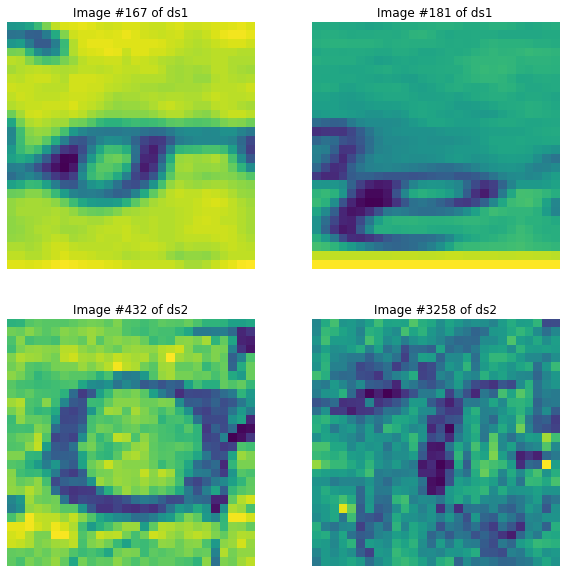

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].axis("off") #dropping the x-ticks and y-ticks
ax[0,0].imshow(ds1.img[167])
ax[0,0].set_title("Image #167 of ds1")
ax[0,1].axis("off") #dropping the x-ticks and y-ticks
ax[0,1].imshow(ds1.img[108])
ax[0,1].set_title("Image #181 of ds1")
ax[1,0].axis("off") #dropping the x-ticks and y-ticks
ax[1,0].imshow(ds2.img[432])
ax[1,0].set_title("Image #432 of ds2")
ax[1,1].axis("off") #dropping the x-ticks and y-ticks
ax[1,1].imshow(ds2.img[3258])
ax[1,1].set_title("Image #3258 of ds2")

# Part 2
* Visualise the character frequency per dataset (exact values to be shown also).
* Visualise also the century (of the first) and the TM frequency (of the second dataset).

## Plots for Character Frequency

For the `ds1` dataframe, we already have a column that features the character that corresponds to each image. We need to do the same for `ds2`. Fortunately, the character of each image is the first letter of the image's name. We will extract this using a `lambda` function and the [split function](https://python-reference.readthedocs.io/en/latest/docs/str/split.html) that Python's `str` objects have.

In [ ]:
#creating the 'character' column of ds2 that holds the ground truth of 
#each image's character
ds2['character'] = ds2.name.apply(lambda x: x.split("_")[0])

In order to plot the character frequency per dataset we need to get the actual character counts per datasets. We will use the [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) command of `pandas` applied on the `character` columns. This will return a `Series` object indexed at the character with values each letter's number of appearences in the `character` columns.

In [ ]:
#finding the number of appearences of each character in each dataset
ds1_counts = ds1.character.value_counts()
ds2_counts = ds2.character.value_counts()

Time to make the first two frequency plots. We will use a combination of `seaborn` and `matplotlib` for the plots, in order for the creation of the plots to be easier and for the actual plots to be more aesthetically pleasing.

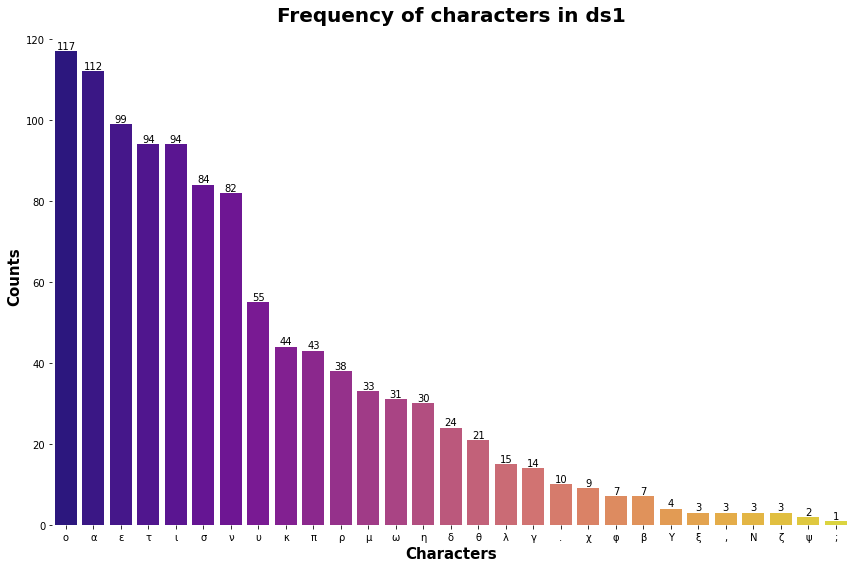

In [ ]:
import seaborn as sns

#the barplot was created with this command: https://seaborn.pydata.org/generated/seaborn.barplot.html
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=ds1_counts.index, y=ds1_counts, ax=ax, palette = "plasma")

_ = ax.set_ylabel("Counts", weight = "bold", size=15)   #setting the title of the y-axis
_ = ax.set_xlabel("Characters", weight = "bold", size=15)   #setting the title of the x-axis
_ = ax.set_title("Frequency of characters in ds1", weight = "bold", size=20)    #setting the plot title

'''
to add the actual values of the bins we used this command:
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html#matplotlib.axes.Axes.bar_label
This command is available from matplotlib version 3.4.0 and onwards and this is
the reason we upgraded this package
'''
ax.bar_label(ax.containers[0]) 

plt.box(False)    #dropping the black border of the plot
plt.tight_layout()
plt.savefig("ds1_char_freq")

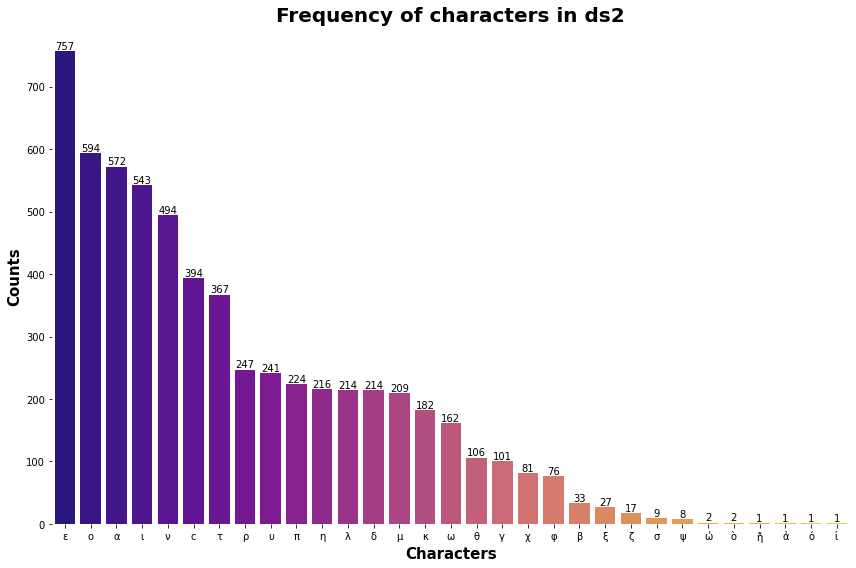

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

#the barplot was created with this command: https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x=ds2_counts.index, y=ds2_counts, ax=ax, palette = "plasma")

_ = ax.set_xlabel("Characters", weight="bold", size=15)   #setting the title of the x-axis
_ = ax.set_ylabel("Counts", weight="bold", size=15)   #setting the title of the y-axis
_ = ax.set_title("Frequency of characters in ds2", weight="bold", size=20)    #setting the plot title

'''
to add the actual values of the bins we used this command:
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html#matplotlib.axes.Axes.bar_label
This command is available from matplotlib version 3.4.0 and onwards and this is
the reason we upgraded this package
'''
ax.bar_label(ax.containers[0])

plt.box(False)    #dropping the black border of the plot
plt.tight_layout()
plt.savefig("ds2_char_freq")

## Plot for Century frequency

We will extract the frequency of each century in the same way as before for the character frequency, using the [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) command.

In [ ]:
#finding the number of appearences of each century on ds1
ds1_cent = ds1.century.value_counts()

Now, time for the actual plot.

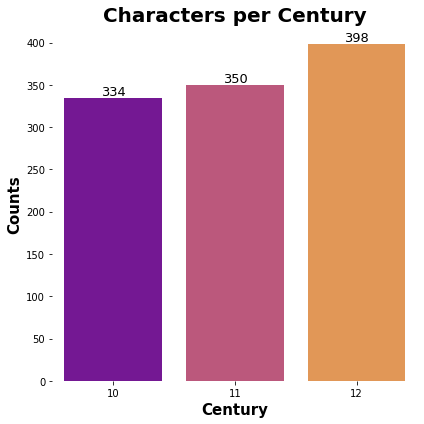

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

#the barplot was created with this command: https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x=ds1_cent.index, y=ds1_cent, ax=ax, palette = "plasma")

_ = ax.set_ylabel("Counts", weight = "bold", size=15)   #setting the tilte of the y-axis
_ = ax.set_xlabel("Century", weight = "bold", size=15)    #setting the title of the x-axis
_ = ax.set_title("Characters per Century", weight = "bold", size=20)    #setting the plot title

'''
to add the actual values of the bins we used this command:
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html#matplotlib.axes.Axes.bar_label
This command is available from matplotlib version 3.4.0 and onwards and this is
the reason we upgraded this package
'''
ax.bar_label(ax.containers[0], size=13)

plt.box(False)    #dropping the black border of the plot
plt.tight_layout()
plt.savefig("cent_freq")

## Plot for TM frequency

We will extract the frequency of each TM in the same way as before for the character and century frequencies, using the [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) command, where we will add the arguemend `asending=True` so that the `Series` object will be sorted in ascending order. This was done so that the plot is more aesthetically pleasing.

In [ ]:
#finding the TM frequency in ds2
ds2_tm = ds2.TM.value_counts(ascending=True)

Time for the actual plot. This time though we opted for a horizontal barplot. This was done purely because the vertical one was too cluttered as `TM` features many different values. Thus the normal barplot be suboptimal for presentation. This may also not be the best way for representing such variant data, but it's certainly better that the normal barplot.

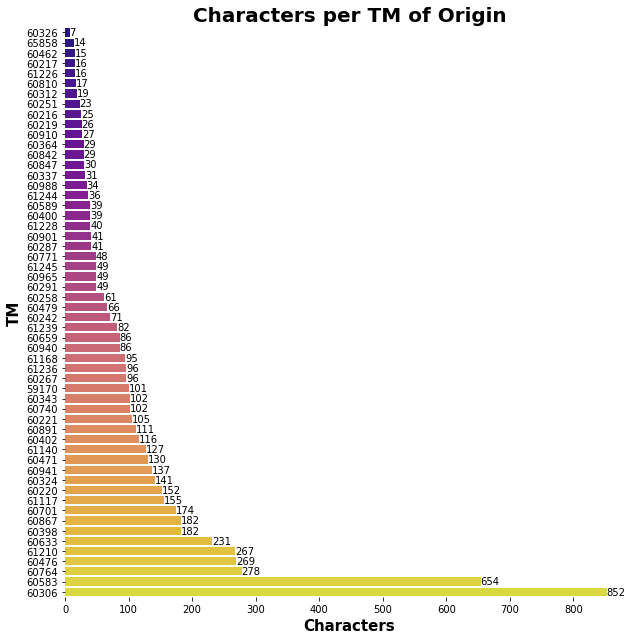

In [ ]:
fig, ax = plt.subplots(figsize=(9,9))

#the barplot was created with this command: https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(y=ds2_tm.index, x=ds2_tm, ax=ax, palette = "plasma")

_ = ax.set_ylabel("TM", weight = "bold", size=15)   #setting the title of the y-axis
_ = ax.set_xlabel("Characters", weight = "bold", size=15)   #setting the title of the x-axis
_ = ax.set_title("Characters per TM of Origin", weight = "bold", size=20)   #setting the plot title

'''
to add the actual values of the bins we used this command:
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html#matplotlib.axes.Axes.bar_label
This command is available from matplotlib version 3.4.0 and onwards and this is
the reason we upgraded this package
'''
ax.bar_label(ax.containers[0])

plt.box(False)    #dropping the black border of the plot
plt.tight_layout()
plt.savefig("tm_freq")

# Part 3
* Train a machine learning algorithm for the task of classifying the character depicted in the image. Visualise the confusion matrix for the task. 

* Train and assess the same algorithms for the task of classifying the century for the first and the TM for the second dataset. Show the classification report per task.

* Report your findings with respective text cells in this notebook.

## Task 1


We decided to perform the classification task based on the character of each image using three different classification algorithms, [SVM](https://en.wikipedia.org/wiki/Support_vector_machine), [K-NN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) and a gradient boosting algorithm called [Hist Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html), which is available on `sklearn`.

### SVM

#### Model Selection and Data Preprocessing

We will train a simple SVM model with a radial kernel for these tasks. Let's import the packages that we will use

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

First things first, we will drop the rarest  characters of both dataframes.. More specifically, we define a cut-off for characters that appear less than 1% of the total dataset length. We used the code provided by the second answer of this StackOverflow thread. 

https://stackoverflow.com/questions/66424216/drop-infrequent-values-in-column

In [ ]:
ds1_counts = ds1.character.value_counts(ascending=False)
to_drop = ds1_counts[ds1_counts<0.01*len(ds1)].index
ds1 = ds1[~ds1.character.isin(to_drop)]

In [ ]:
ds2_counts = ds2.character.value_counts(ascending=False)
to_drop = ds2_counts[ds2_counts<0.01*len(ds2)].index
ds2 = ds2[~ds2.character.isin(to_drop)]

Now that we dropped the rare characters, we can create a big dataframe that will ony hold the `flat_norm` and `character` columns of `ds1` and `ds2`. The logic behind this decision is that both of these datasets contain pictures of letters, and the ground truth of these letters. Therefore there is no point to create two different models, each one for a specific dataset. 

To achieve this, we will firstly save these two columns (i.e. `flat_norm` and `character`) in two new dataframe, one for each of the original datasets..

In [ ]:
dsf1 = ds1[['flat_norm','character']]   #slice of ds1 to keep the flat_norm and character columns
dsf2 = ds2[['flat_norm','character']]   #slice of ds2 to keep the flat_norm and character columns

Then, we will use the [concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) command of `pandas` to put `dsf2` right below `dsf1`. We will also use the [reset_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) command to solve any indexing issues that may arrise from the concatenation.

In [ ]:
#merging the two dataframes, one right below the other
dsf = pd.concat([dsf1,dsf2]).reset_index()

Now, since the images are in the `flat_norm` column of the new and full dataframe, we will save them in a new variable, let's say `X`. After that we will check the dimensions of `X` to make sure that everything is alright. To do this we will use the [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html) command of `pandas`.



In [ ]:
#saving each image's vector form in a new variable
X = dsf['flat_norm']

#checking the shape of the the new variable-we expect to see (...,784)
#since each image is a vector of length 28x28=784
X.shape

(7024,)

Something is not right here, since X's elements are vectors with length 28x28 = 784. Let's transform this `Series` to a `numpy` array to get a better view of things. To do this, we will use the [to_numpy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html) command of `pandas`.



In [ ]:
X = X.to_numpy()
X.shape

(7024,)

Still nothing. But, since this is now a `numpy` array we can use the [stack](https://numpy.org/doc/stable/reference/generated/numpy.stack.html) command of `numpy`.



In [ ]:
X = np.stack(X)
X.shape

(7024, 784)

There we go. Now we are ready to proceed with the splitting of the data for training and testing. But first, we will save on a different variable (this time `y`) the target variable, the `character`, which, for each and every image on our `dsf` dataframe holds the truth of the image.

In [ ]:
y = dsf.character.to_numpy()

Now, we will split our data for training and testing our model. To do this, we will use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) command from `sklearn`.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=39)

#### Model Training

We chose to train a simple `SVM` model. The thing is though, that we have absolutely no idea what the best parameters for it will be. 

Therefore, as per the [class notes on classification](https://eclass.aueb.gr/modules/document/index.php?course=INF316&openDir=/63398217HUxN/6363ba61dokq) we will perform a Grid Search to find the parameters that will maximize the score of the algorithm.

The parameters of interest in `SVM` are 2, `C` and `gamma`. We create a dictionary called `param_grid` that holds various values for these 2 parameters. Upon this dictionary will [GridSearch]( https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) search upon for the combination that return the best score.

We will also use the `kernel=rbf` option since this is usually the best option for classification tasks.

In [ ]:
#setting the parameters of SVM that GridSearch will choose from
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.001, 0.01, 0.1] }

clf = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5)   #performing the search
clf = clf.fit(X_train, y_train)   #training the model for the best combination of parameters
clf.best_estimator_   #the best combination of parameters

SVC(C=1000.0, gamma=0.01)

Now, we have already trained our model with the best combination of parameters on our data. This best combination is `C=1000=1e3` and `gamma=0.01`. 

Time to make some predictions based on our `X_test` dataset.

In [ ]:
#making predictions based on our data to evaluate our model
y_pred = clf.predict(X_test)

#### Findings and Inference

Now that we have made our predictions, we are ready to evaluate our model. To this end we will use two evaluation metrics, the [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) and the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           α       0.61      0.65      0.63       108
           γ       0.39      0.53      0.45        17
           δ       0.58      0.54      0.56        41
           ε       0.62      0.65      0.64       114
           η       0.58      0.53      0.55        36
           θ       0.25      0.22      0.24        18
           ι       0.61      0.82      0.70        88
           κ       0.72      0.57      0.64        40
           λ       0.34      0.33      0.34        30
           μ       0.77      0.62      0.69        37
           ν       0.77      0.83      0.80        87
           ο       0.65      0.73      0.69       101
           π       0.62      0.61      0.62        46
           ρ       0.71      0.52      0.60        48
           σ       0.50      0.50      0.50         8
           τ       0.80      0.68      0.73        81
           υ       0.57      0.53      0.55        40
           φ       0.86    

Here we can see that the overall accuracy of our algorithm is 64%. **But**, this is deceiving since our data classes are incredibly imbalanced as we saw from the respective barplots in Part 2. The `macro avg` score is 59% which is somewhat more accurate and we can trust it a bit more.

What we will check here is the `f1-score` per class.

What we notice from this report is that on most cases our algorithm performed well, even on some classes with really small support (like `φ` where the f1-score is 75%). One would think that the more data on our support the higher the f1-score would be. But this is not the case here as classes like `ε` and `α` where the support is big (at least relatively to the others) the f1-score is at best 64%.

The class that makes the difference here is `ν` where the f1-score is 80%. `θ` and `λ` also stand out but as the negative cases because their f1-score is extremely small (24% and 34% respectively).

Now, we will visualise the confusion matrix to see there the problems are exactly.

For the visualization of the confusion matrix we decided to go with a [seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) so that we can easily see the agreements and disagreements based on color.

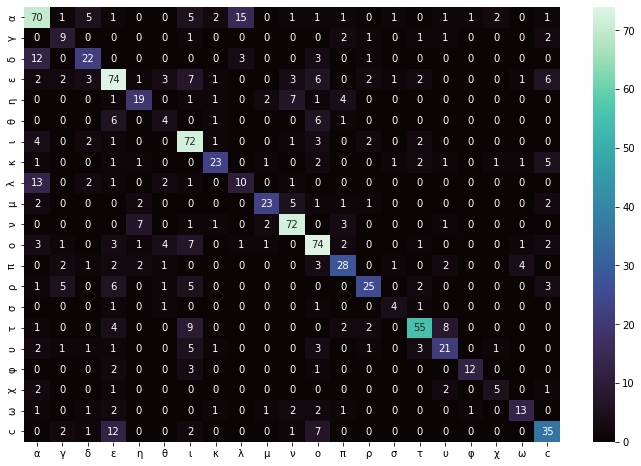

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap='mako', fmt='.5g', ax=ax)
_ = ax.set_xticklabels(labels=sorted(dsf.character.value_counts().index))
_ = ax.set_yticklabels(labels=sorted(dsf.character.value_counts().index))

Here we see exactly where were the misclassifications. 
The most misclassifications were the 15 instances of class `α` that were misclassified to class `λ` (of all classes). Close second 13 instances of class `λ` that were classified to class `α` and 12 instances of class `δ` that were also missclassified to class `α`. Also 12 were the misclassified instances of class `c` that were misclassified to class `ε`, which is reasonable enough since the shape of these two letters is quite similar. 

We notice that there is a tendency to classify a lot of instances to classes `α` and `ε`, even though they don't belong to these classes. More specifically our model has a small difficutly to tell the differences of `λ` and `α` since it misclassified a lot of instances of bot classes to the opposite class. 

Also, on class `θ` we see that most of its instances we classified on different classes, more specifically `ε` and `ο`. 

The fact though is that these misclassifications can, at least to some degree, be excused and could be attributed to exogenous factors, like papyri erosion or bad quality picture. 

Therefore, we can trust this model, at least to some degree, for most of the classes and cases.

### K-NN

#### Model Selection and Data Preprocessing

We will now test a K-NN model against our previous SVM. Let's import the packages we will use.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Since we have already preprocessed our data, all that's left to do is just split them for training and testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=39)

#### Model Training

Since K-NN is considered to be one of the best classification algorithms out there, even though it is the most basic one, we will noth perform any hyperparameter tuning and simply let it run with the default parameters.

Let's create our model now. We will use the [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) method of `sklearn`.

In [ ]:
#creating our model
knn = KNeighborsClassifier()

Now it's time to train it using our data and make sime predictions to test its accuracy.

In [ ]:
knn.fit(X_test,y_test)    #fitting the model to our data
y_pred = knn.predict(X_test)    #making predictions to evaluate the model

#### Findings and Inference

Now that we have made our predictions, we are ready to evaluate our model. To this end we will use two evaluation metrics, the classification report and the confusion matrix.

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           α       0.81      0.43      0.56       203
           γ       0.71      0.52      0.60        23
           δ       0.46      0.47      0.47        40
           ε       0.75      0.56      0.64       153
           η       0.61      0.49      0.54        45
           θ       0.39      0.44      0.41        16
           ι       0.81      0.72      0.76        99
           κ       0.33      0.57      0.41        23
           λ       0.20      0.55      0.29        11
           μ       0.46      1.00      0.63        17
           ν       0.87      0.67      0.76       114
           ο       0.53      0.64      0.58        84
           π       0.41      0.95      0.58        20
           ρ       0.44      0.75      0.55        28
           σ       0.50      0.80      0.62         5
           τ       0.63      0.81      0.71        63
           υ       0.45      0.75      0.56        24
           φ       0.44    

We observe that the total accuracy of our model is 61% with although not bad, it is deceiving, since the classes are highly unbalanced. Here the `macro avg` score is 54% which is not all that great, but we trust it more than accuracy.

We need to check the class-specific `f1-score`. 

The `f1-score` results are similar to the ones of the SVM but we do see some differences, namely the significantly imporved scores of class `θ` (24% to 41%) and the worsened score of classes `λ` (34% to 29%) and especially `χ` (50% to 17%). 

In general though we observe that the algorithm performe about the same on most classes with not a lot of deviations.

Let's see the confusion matrix to get a better view of the misclassifiactions.

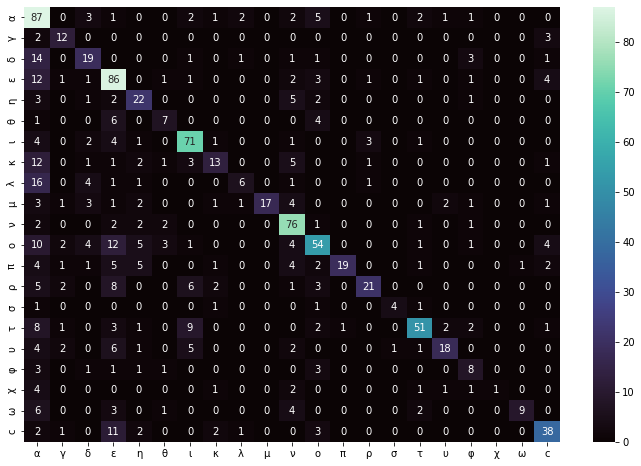

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap='mako', fmt='.5g', ax=ax)
_ = ax.set_xticklabels(labels=sorted(dsf.character.value_counts().index))
_ = ax.set_yticklabels(labels=sorted(dsf.character.value_counts().index))

Here we see that there were a lot of misclassifications to class `α`, since classes `ο`, `λ`, `κ`, `ε` and `δ` all misclassified more than 10 instances to class `α`. What is not present though is the misclassifications of class `α` to class `λ`, which seems to resolve the problem at least to this end.

In general though we see abouth the same results as the previous model. Therefore, we can, to a lesser degree trust it.

### Gradient Boosting

#### Model Selection and Data Preprocessing

We chose to use [Hist Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html) from `sklearn`, because it is significantly faster than the usual Gradient Boosting library, `XGBoost` and other boosting algorithms, while keeping the good results that these time costing models would produce.

Before we delve in the classification task, let's import the packages that we will use here.

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Now, as before, since our data have already been preprocessed there is nothing left to do on this part other than split our data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=39)

#### Model Training

Here, yet again, we will not perform any GridSearch for hyperparameter tuning since Boosting Algorithms tend to have better results than the normal classification models on the default parameters. 

In [ ]:
#creating the model
gbc = HistGradientBoostingClassifier(random_state=39)

#fitting the model to our data
gbc.fit(X_train, y_train)

#making predictions in order to evaluate our model's 
y_pred=gbc.predict(X_test)


#### Findings and Inference

Now that we have made our predictions, we are ready to evaluate our model. To this end we will use again the same two evaluation metrics, the classification report and the confusion matrix.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           α       0.54      0.81      0.64       108
           γ       1.00      0.18      0.30        17
           δ       0.86      0.29      0.44        41
           ε       0.49      0.83      0.61       114
           η       0.67      0.33      0.44        36
           θ       1.00      0.06      0.11        18
           ι       0.63      0.83      0.72        88
           κ       0.85      0.28      0.42        40
           λ       0.23      0.10      0.14        30
           μ       0.78      0.38      0.51        37
           ν       0.64      0.79      0.71        87
           ο       0.51      0.80      0.62       101
           π       0.75      0.52      0.62        46
           ρ       0.86      0.40      0.54        48
           σ       0.50      0.12      0.20         8
           τ       0.89      0.68      0.77        81
           υ       0.67      0.50      0.57        40
           φ       1.00    

This model's accuracy is exactly 60% which is about the same the untuned K-NN's, and just shy of 4% down from the tuned SVM. But again, this is not trustworth because of the highly unbalanced classes. A metric that can be trusted more is the `macro avg` which sits at 48% and is therefore not good.

We need to check the `f1-score` of each class.

Here the scores are quite different from both the K-NN's and the SVM's. We see a lot more `f1-scores` sitting below 50% and some (such as `θ` and `λ`) sitting below 20% too, something that we did not observe at the previous models.

In the cases that both of the previous models performed well, the boosting model performs well too, but not that well. This leads us to not trust it too much, but we can trust in its potential, since with a time consuming Grid Search on its many parameters we will get better results than the previous models.

Let's also visualise the confusion matrix.

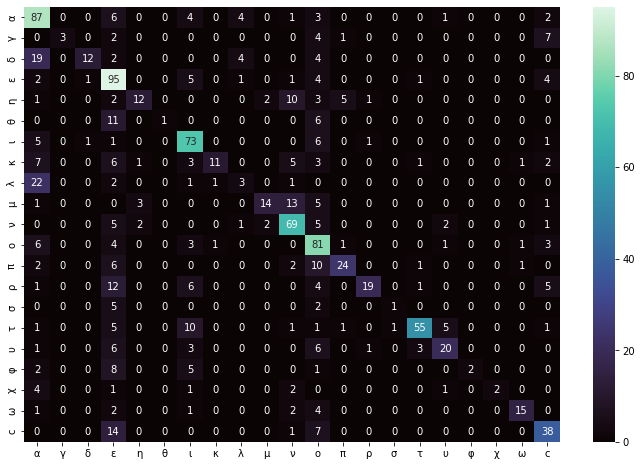

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap='mako', fmt='.5g', ax=ax)
_ = ax.set_xticklabels(labels=sorted(dsf.character.value_counts().index))
_ = ax.set_yticklabels(labels=sorted(dsf.character.value_counts().index))

Here we see that this model's results and misclassifications are quite similar to the SVM's but a tad more extreme:
- Classes `λ` and `δ` still have a lot of misclassifications to class `α`
- The problem of class `α` misclassifications to class `λ` seems to also be resolved here
- There are a few of misclassifications to class `ε`, especially from classes `c`, `ρ` and `θ`, which to a degree can be excused because the shape of these letters is similar and an untuned model can easily be deceived by it

## Task 2

#### General Model Selection and Data Preprocessing

The images are all ready to go from the preprocessing we did [here](https://colab.research.google.com/drive/1-rG7rCtFVmYKOVp2pXlv0E_JGwSKbPDx#scrollTo=I8tpCNck5YtH&line=1&uniqifier=1), with the only difference being that we will use only the preprocessed versions of the datasets before we merged them into one big dataset (i.e. we will use `dsf1` and `dsf2`). With this out of the way, all that's left to do is prepare the variables that will hold the truth of the images in each case.

Thus, we will create two variables, one that will hold the century from the `ds1` dataset, and one that will hold the TM column from  the `ds2` dataset. As before, we will use the `to_numpy` command.

In [ ]:
cent = ds1.century.to_numpy() #saving the 'century' column of ds1 to a numpy array
tm = ds2.TM.to_numpy()  #saving the 'TM' column of ds2 to a numpy array

Now, exaclty as we did [here](https://colab.research.google.com/drive/1-rG7rCtFVmYKOVp2pXlv0E_JGwSKbPDx#scrollTo=I8tpCNck5YtH&line=1&uniqifier=1) for the `dsf` dataset, we will do now for the `dsf1` and `dsf2` datasets. We will do this because, since the problem with the shape existed on the joint dataframe, it must exist on each of the two that comprise it. Therefore, we will follow the exact same steps.

These new variables will be called `X1` and `X2` following the naming scheme we created there.

In [ ]:
X1 = dsf1.flat_norm
X1 = np.array(X1)
X1 = np.stack(X1)

X2 = dsf2.flat_norm
X2 = np.array(X2)
X2 = np.stack(X2)

#### Models for Century 

##### SVM

Before we begin with the actual classification task, we will first import the packages we will use.

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

###### Model Training

Now, we will split our data for training and testing our model. As before, we will use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) command of `sklearn`.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, cent, test_size=0.15, random_state=39)

We will now perform the same GridSearch for the same parameters for the SVM model.

In [ ]:
#setting the parameters of SVM that GridSearch will choose from
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.001, 0.01, 0.1] }

clf = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5) #performing the search
clf = clf.fit(X_train, y_train) #training the model for the best combination of parameters
clf.best_estimator_ #the best combination of parameters

SVC(C=1000.0, gamma=0.1)

Now, the model is trained with the best possible parameter combination, which is `C=1000=1e3` and `gamma=0.1`. 

Time to make some predictions based on our `X_test` dataset.

In [ ]:
#making predictions based on our data to evaluate the model`
y_pred = clf.predict(X_test)

###### Findings and Inference

Now that we have trained and tested our model, it's time to evaluate it. To this end, we will use the same evaluation metrics as before, the classification report and the confusion matrix.



In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          10       0.82      0.78      0.80        46
          11       0.82      0.73      0.77        51
          12       0.79      0.90      0.84        58

    accuracy                           0.81       155
   macro avg       0.81      0.80      0.80       155
weighted avg       0.81      0.81      0.80       155



From the classification report we see that the overall accuracy of the SVM is 81%, which is a very respectable percentage. And, since these classes (as we saw on Part 2) are mostly balanced, accuracy can be trusted, along with the `f1-score` of each class and the `macro avg` metrics.

In the case of the `f1-score` of each class, we see that it is high across all classes, and even more so on class `12`. Also, the `macro avg` metric sits comfortably at 80% which tells us that this is a good classification model for the century variable.

Therefore, we have a very strong indication that our algorithm performs really well on this classification task. 

Let's check now the confusion matrix.

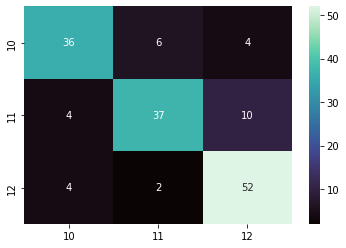

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap='mako', fmt='.5g', ax=ax)
_ = ax.set_xticklabels(labels=sorted(ds1.century.value_counts().index))
_ = ax.set_yticklabels(labels=sorted(ds1.century.value_counts().index))

Here we see that our model performed adequately well on the texts of the 10th and 12th century with only a few misclassifications (10 for the 10th century and 6 for the 12th). But, it lacks on the texts of the 11th century where it misclassified 4 texts as 10th century texts and 10 as 12th century texts. 

Overall though, it performs really well, and with more data it could perform even better.

Therefore, we can definately trust this model for texts of 10th and 12th century, and we can mostly trust it for texts of 11th century.

##### K-NN

Before starting with the actual classification task we will import the packages we will use.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

###### Model Training

Now we will use the same "vanilla" K-NN model we used in Task 1 to classify the texts per century. 

In [ ]:
#creating the model
knn = KNeighborsClassifier()

#fitting it to our data
knn.fit(X_train,y_train)

#making predictions to evaluate it
y_pred = knn.predict(X_test)

###### Findings and Inference

We are now ready to evaluate it based on the predictions we made with it. We will once more use same evaluation metrics as before, the classification report and the confusion matrix. 

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          10       1.00      0.44      0.61       105
          11       0.35      1.00      0.52        18
          12       0.53      0.97      0.69        32

    accuracy                           0.61       155
   macro avg       0.63      0.80      0.61       155
weighted avg       0.83      0.61      0.62       155



The accuracy on our K-NN model is just 61%, a whole 20% lower than that of the SVM, as is the `macro avg` metric. We can already see that this model performs significantly worse than the SVM in this case.

Even if we see the `f1-score` per class we see that it lacks on every single class. 

Let's visualize the confusion matrix to see where exactly it lacks.

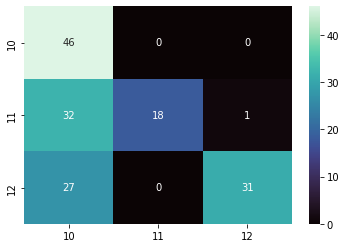

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap='mako', fmt='.5g', ax=ax)
_ = ax.set_xticklabels(labels=sorted(ds1.century.value_counts().index))
_ = ax.set_yticklabels(labels=sorted(ds1.century.value_counts().index))

Now we can see things more clearly. We see that it evaluated perfectly every `10th century` text to the `10th century` class. But, is also misclassified an astonishing 32 `11th century` texts and 27 `12th century` texts as `10th century` texts.

Therefore, we see that it significantly lacks in differentiating the texts between centuries, and therefore we cannot trust it on texts that it classified as `10th century` texts. But, we see that only 1 other text was misclassified, and it was a `11th century` as a `12th century` text. 

Thus, we can trust this model (to a certain degree at least) if it says that a text belongs to the `11th` or `12th` centuries but definately not if it say it belongs to the `10th century`.

##### Gradient Boosting

Before using the algorithm for the classification task we will import the packages we will use.

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

###### Model Training

We will now train our default boosting model. We will split our data with the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) command of `sklearn`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, cent, test_size=0.15, random_state=39)

Now, with that out of the way, we will again train our "vanilla" model and evaluate it.

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

#creating our model
gbc = HistGradientBoostingClassifier(random_state=39)

#fitting it to our data
gbc.fit(X_train, y_train)

#making predictions to evaluate it
y_pred=gbc.predict(X_test)


###### Findings and Inference

Now, it is time to evaluate our model. As before, we will use the same metrics for evaluation, the classification report and the confusion matrix.

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          10       0.85      0.87      0.86        45
          11       0.76      0.81      0.79        48
          12       0.93      0.87      0.90        62

    accuracy                           0.85       155
   macro avg       0.85      0.85      0.85       155
weighted avg       0.86      0.85      0.85       155



We can see that the boosting model received an astonishing 85% accuracy and `macro avg`, which is higher than even that of the SVM. And since the classes are not unbalanced we can trust the accuracy metric.

Let's visualize the confusion matrix to see where were the misclassifications.

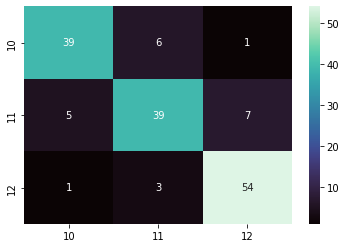

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap='mako', fmt='.5g', ax=ax)
_ = ax.set_xticklabels(labels=sorted(ds1.century.value_counts().index))
_ = ax.set_yticklabels(labels=sorted(ds1.century.value_counts().index))

From this we observe that there were very few misclassifications, and mostly from `11th century` texts, 5 as `10th century` texts and 7 as `12th century` texts. Other than that, we can see that it performs admirably.

Therefore this is a model we can trust we a very high degree of certainty.

#### Models for TM

##### SVM

Before we begin with the actual classification task, we will first import the packages we will use.

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

###### Model Training

Now, we will split our data for training and testing our SVM model. As before, we will use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) command of `sklearn`.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, tm, test_size=0.15, random_state=39)


Now that we have split our data, we can perform our GridSearch for the `C` and `gamma` parameters of the `SVM` model.

In [ ]:
#setting the parameters of SVM that GridSearch will choose from
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.001, 0.01, 0.1] }

clf = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5) #performing the search
clf = clf.fit(X_train, y_train) #training the model for the best combination of parameters
clf.best_estimator_ #the best combination of parameters

Our model finished training and returned the best possible combination of the `C` and `gamma` parameters of the `SVM` model which is `C=1000=1e3` and `gamma = 0.01`, as was the case for our first model.

Now, we will make our predictions upon the `X_test` dataset to test the quality of our model.

In [ ]:
y_pred = clf.predict(X_test)

###### Findings and Inference

As was the case before, we will also use in this case the classification report and confusion matrix.

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       59170       0.26      0.31      0.29        16
       60216       1.00      0.17      0.29         6
       60219       0.00      0.00      0.00         2
       60220       0.50      0.42      0.45        24
       60221       0.36      0.25      0.30        16
       60242       0.30      0.60      0.40         5
       60251       0.00      0.00      0.00         4
       60258       0.40      0.25      0.31         8
       60267       0.27      0.20      0.23        15
       60287       0.00      0.00      0.00         7
       60291       0.00      0.00      0.00         8
       60306       0.51      0.74      0.60       123
       60312       0.00      0.00      0.00         2
       60324       0.38      0.35      0.36        17
       60337       0.33      0.25      0.29         4
       60343       0.54      0.44      0.48        16
       60364       0.00      0.00      0.00         6
       60398       0.39    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Here, things are a little more straightforward. This is not a great model. We see the overall acuuracy of the model sitting at just 49% which is really low, while the `macro avg` at the astonishingly low 25%. Therefore, we can already tell that this model cannot be trusted. 

But again, this dataset is also heavily unbalanced, so a better metric is the f1-score. But again, this is, at most cases, not good, as for the majority of the classes it sits below 50%. Notable exceptions being the classes `61210` and `60633` where it sits at 79% and 77% respectively. 

We also see a lot of classes that the f1-score is 0. That is because these classes were completely misclassified. These classes had a very small support though and is, to a certain degree, expected to be misclassified by this model. 

Let's check now the confusion matrix too.

<AxesSubplot:>

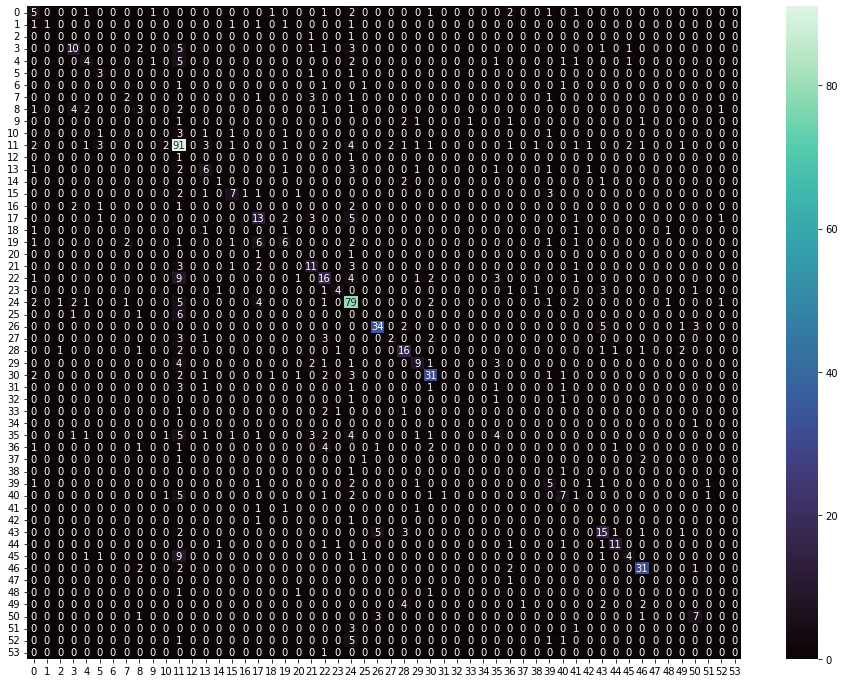

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap='mako', fmt='.5g', ax=ax)

Here we see what we meant before that there were a lot of classes that were completely misclassified, as there are a lot of zeros in the diagonal of the matrix (which is the correct classifications).

All in all, this model is not to be trusted, not for any class, no matter the f1-score. For this case, a better model must be considered. A notable choice would be `xgboost` if time or resources weren't of the essence.

##### K-NN

Before starting with the actual classification task we will import the packages we will use.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

###### Model Training

Now, time for the K-NN model. We will again split the data using the the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) command of `sklearn`.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, tm, test_size=0.15, random_state=39)

Time to train the model.

In [ ]:
#creating the model
knn = KNeighborsClassifier()

#fitting it to our data
knn.fit(X_test,y_test)

#making prediction to evaluate it
y_pred = knn.predict(X_test)

###### Findings and Inference

Time to evaluate K-NN using the same metrics as before, the classification report and the confusion matrix.

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       59170       0.62      0.34      0.44        29
       60216       0.50      0.06      0.10        54
       60219       1.00      0.06      0.11        35
       60220       0.46      0.25      0.32        44
       60221       0.31      0.10      0.16        48
       60242       0.20      0.20      0.20         5
       60251       0.25      1.00      0.40         1
       60258       0.12      0.06      0.08        16
       60267       0.33      0.50      0.40        10
       60287       0.00      0.00      0.00         0
       60291       0.12      0.14      0.13         7
       60306       0.65      0.53      0.59       150
       60312       0.00      0.00      0.00         0
       60324       0.12      0.22      0.15         9
       60337       0.00      0.00      0.00         0
       60343       0.56      0.32      0.41        28
       60364       0.33      1.00      0.50         2
       60398       0.85    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We did not expect much as SVM did not perform well on TM, this was disappointing. The accuracy is 35% and the `macro avg` just 17%. 

There is not much to be said here, this is extremely dissapointing.

We will also visualize the confusion matrix but it will not say much either.

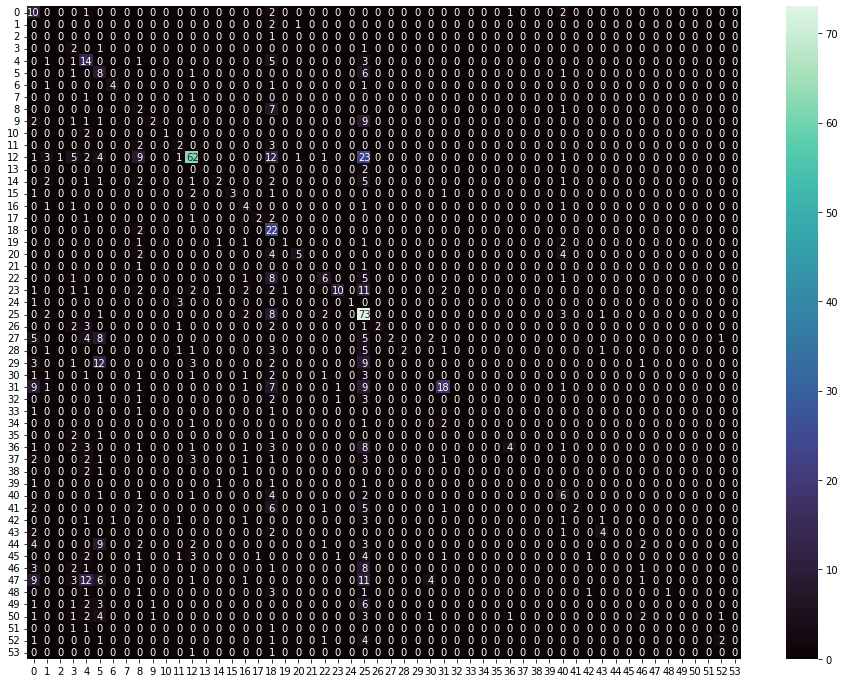

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap='mako', fmt='.5g', ax=ax)

AS we expected, there is not much to be said about this model, it is an extremely bad model and we don't trust it one bit.

##### Gradient Boosting

Before using the algorithm for the classification task we will import the packages we will use.

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

###### Model Training

Time for the boosting model. Once more we will use the [Hist Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html) from `sklearn`. We will split our data with the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) command of `sklearn`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, tm, test_size=0.15, random_state=39)

Time to train our default model.

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

#creating our model
gbc = HistGradientBoostingClassifier(random_state=39)

#fitting it to our data
gbc.fit(X_train, y_train)

#making predictions to evaluate it
y_pred=gbc.predict(X_test)


###### Findings and Inference

We will now evaluate this model based on the predictions we made with it using the same metrics as before, the classification report, and the confusion matrix. 

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       59170       0.19      0.33      0.24         9
       60216       0.00      0.00      0.00         0
       60219       0.00      0.00      0.00         3
       60220       0.08      0.25      0.12         8
       60221       0.12      0.50      0.20         4
       60242       0.20      0.25      0.22         4
       60251       0.00      0.00      0.00         1
       60258       0.00      0.00      0.00         2
       60267       0.07      0.17      0.10         6
       60287       0.14      0.50      0.22         2
       60291       0.00      0.00      0.00         1
       60306       0.92      0.40      0.56       284
       60312       0.00      0.00      0.00         0
       60324       0.18      0.38      0.24         8
       60326       0.00      0.00      0.00         1
       60337       0.00      0.00      0.00         3
       60343       0.25      0.80      0.38         5
       60364       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

AS before, this is not great, this is not even good. The accuracy of our model is just 46% and the `macro avg` just 19%. We know from now that we definatelly can't trust this model.

Let's visualize the confusion matrix.

<AxesSubplot:>

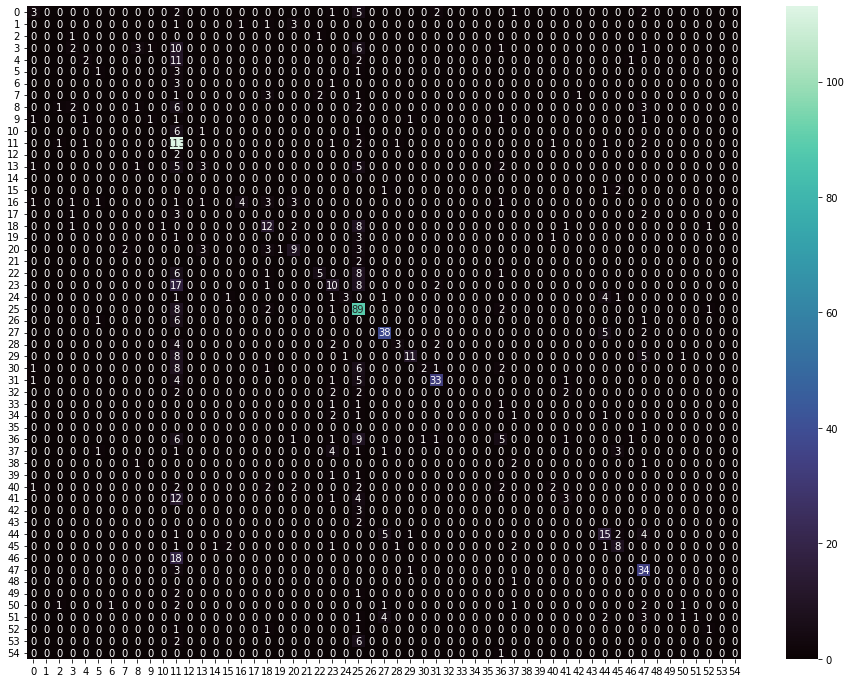

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap='mako', fmt='.5g', ax=ax)

## General Notes in Part 3

We noticed some things while training all these models for Part 3. Firstly, even though we used wherever we could the `random_state=39` arguement, when changing runtimes the results changed. We couldn't pinpoint the exact reason behind this change. The best assumption we have is that it is because of the way the files were unziped and traversed through in order to be read and saved to our dataframes. This is just an assumption though.

# Part 4
* Perform kmeans clustering on the images of the first dataset and select the optimum k using Normalised Mutual Information, where as ground truth is used (a) the character and (b) the century. Report the best k in each case. 

Here, we will use K-Means to cluster the images of the first dataset based on two differend ground truths, the character, and the century. Our ultimate goal is to find the best k in both cases.

But, we will use K-Means in two different ways and, in both cases, compare the results. These two ways are the usual K-Means and K-Means where we used a pre-trained Neural Network (namely ResNet50, but others like VGG16 can also be used) to perform the feature extraction on the images.

Before we begin with the K-Means though, we will import the packages we will use. We need a package for K-Means and a package for the Normalized Mutual Information Score, a metric based on which we will choose the optimal k.

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import normalized_mutual_info_score
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import img_to_array
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

## Clustering based on Character

### K-Means

Before we can apply K-Means, we need the right variables. These are the 'flat_norm' and 'character' columns from the dsf1 dataframe. Thus, we do exactly as in Part 3.

In [ ]:
X = dsf1['flat_norm'].to_numpy()
X = np.stack(X)

Now, our class labels are letters of the greek alphabet. Therefore, they are not ideal for the use we want the for, because we like working with numbers.
The solution to this problem is quite simple though, we will use the [ord](https://python-reference.readthedocs.io/en/latest/docs/functions/ord.html) function which transforms the letter to an integer. 

In [ ]:
dsf1['ord'] = dsf1.character.apply(lambda x: ord(x))

In [ ]:
y = dsf1.ord.to_numpy()
y = np.stack(y)

K-Means also uses a train-test split. We will do this exactly as before, in Part 3.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=39)

Now that we have splitted our data, we will save on a variable the number of classes that exist on our training data. These are:

In [ ]:
#More on np.unique here: https://numpy.org/doc/stable/reference/generated/numpy.unique.html
n_letters = len(np.unique(y_train))
print(n_letters)

18


There are a few things left to do though before we can finally perform K-Means to our data.

One thing we have to understand is that K-Means performs the clustering yes, but this doesn't mean that each cluster has one class, a class can be splitted in multiple clusters. This means that the cluster labels and which class(es) belongs to which cluster(s) hat to be inferred.

To this end, we used the code provided by this [site](https://github.com/r-sajal/DeepLearning-/blob/master/ComputerVision/k-means-blog-tutorial.ipynb).

In [ ]:
# Since K-Means Does not know about our labels we have to change labels of k-means according to our usage

# mapping labels from cluster to original labels
def get_reference_dict(clusters,data_label):
    reference_label = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(clusters))):
        index = np.where(clusters == i,1,0)
        num = np.bincount(data_label[index==1]).argmax()
        reference_label[i] = num
    return reference_label
# Mapping predictions to original labels
def get_labels(clusters,refernce_labels):
    temp_labels = np.random.rand(len(clusters))
    for i in range(len(clusters)):
        temp_labels[i] = cluster_labels[clusters[i]]
    return temp_labels

Now, we will perform K-Means for a different number of clusters each time. We will do this for every value between 3 and 40 (or 41 because of Python indexing). We chose this range specifically because, as said [here](https://blog.exploratory.io/k-means-clustering-deciding-how-many-clusters-to-build-d33fd9c68088), "*the smaller number of the clusters is better in order to identify simpler similarities to interpret*".

In [ ]:
clusters = range(3, 41)
nmi_list = []

for n_clusters in clusters:
    kmeans = MiniBatchKMeans(n_clusters=n_letters)
    kmeans.fit(X_train)
    
    nmi = normalized_mutual_info_score(y_train, kmeans.labels_)
    nmi_list.append(nmi)
    
    clusters = kmeans.fit_predict(X_train)
    cluster_labels = get_reference_dict(clusters, y_train)
    predicted_labels = get_labels(clusters, cluster_labels)

Now, we will plot the Normalized Mutual Information Score against the number of clusters.

In [ ]:
labels = list(range(1,20))
labels

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

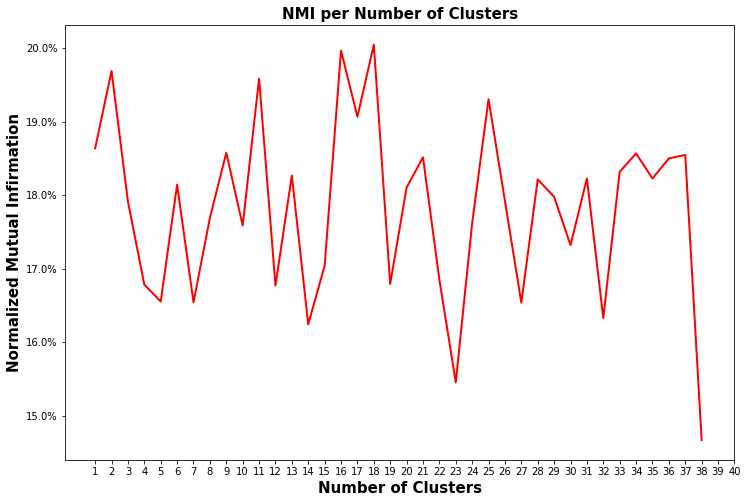

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nmi_list, color='r', linewidth=2)
_ = ax.set_xticks(list(range(40)))
_ = ax.set_xticklabels(list(range(1,41)))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
_ = ax.set_ylabel("Normalized Mutual Infirmation", weight = "bold", size=15)
_ = ax.set_xlabel("Number of Clusters", weight = "bold", size=15)
_ = ax.set_title("NMI per Number of Clusters", weight = "bold", size=15)

From this plot we observe that the highest the NMI can get is just over 20% for just one case of numbers of clusters, where it's close to 21% for 18 clusters. Therefore, this is the k that we choose for this case.

In [ ]:
k = nmi_list.index(max(nmi_list))+1
k

18

### K-Means with ResNet50 Feature Extraction

We will now use the pre-trained Convolutional Neural Network [ResNet50](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50) to extract the features from our images and then perform KMeans on these based on the character they represent. We adapted the code from this [site](https://github.com/r-sajal/DeepLearning-/blob/master/ComputerVision/k-means-blog-tutorial.ipynb) to our own special case.

We will create the `ResNet50` part of our model, where the `input_shape` is chosen to be the rgb images we have on the `image_characters` folder, but reshaped as 32x32 images.

In [ ]:
model =   keras.applications.ResNet50(weights='imagenet', 
                                      include_top=False, 
                                      input_shape=(32, 32, 3))

Before we go through with the rest of the algorithm, we need to what with did with dsf1 for ord to ds1 as it will help us with reading and preprocessing the images directly from their source.

In [ ]:
ds1['ord'] = ds1.character.apply(lambda x: ord(x))

We need though to actually read these images. We will use the [cv2](https://opencv.org/) library of python to that end.

In [ ]:
#creating the lists that will hold our data
data = []
label = []
path = "/content/image_characters/"   #the path to our photos
IMG_SIZE = 32   #the size that our images will be transformed to

for file in os.listdir(path):
  '''
  because some photos had NaN values as character and we have already dropped 
  them, we will check if the photo that is read from the path exists on the ds1
  dataframe where we have dropped the NaN values. If it doesn't, the code proceeds
  to the next photo. 
  '''
  if file in ds1.name.value_counts().index:
    img=cv2.imread(path+file)   #reading the photo
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))   #resizing it
    img=img.astype('float32')   #transforming the integers to floats
    
    #saving each photo's label (as ord(letter)) to the list
    l = ds1[ds1.name==file].ord.to_numpy()    
    label.append(l)
    data.append(img)
  else:
    continue
data = np.array(data)

We will now extract the features of each photo using the following function.

In [ ]:
def extract_vector(data_holder):

    resnet_feature_list = []

    for im in data_holder:

        im = img_to_array(im) 

        img = preprocess_input(np.expand_dims(im.copy(), axis=0))

        resnet_feature = model.predict(img)

        resnet_feature_np = np.array(resnet_feature)

        resnet_feature_list.append(resnet_feature_np.flatten())

    return np.array(resnet_feature_list)

In [ ]:
#extracting the features
array = extract_vector(data)

1/1 [==============================] - 0s 47ms/step


The same issue that we had before with each and every one of the columns of the original dataframes when transformed to `numpy` arrays will also exist here for the character that each image represents (which we have transformed to a number using the`ord` function). So, will apply the same solution.

In [ ]:
label = np.array(label)
label = np.stack(label)
label = label.flatten()

We are finally ready to apply the KMeans algorithm now. As before we will check for the Normalized Mutual Information Score, for a different number of clusters, between 3 and 40.

In [ ]:
clusters = range(3, 41)
nmi_list_res = []

for n_clusters in clusters:
    

    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=39)
    kmeans.fit(array)
    clusters = kmeans.fit_predict(array)
    
    nmi = normalized_mutual_info_score(label, kmeans.labels_)
    nmi_list_res.append(nmi)
    
    '''
    The code for some reason raised the ValueError Exception after it 
    calculated nmi, and it could run subsequently without issues if we
    used the next cluster number.
    For this reason we caught the exception and threw it in the trash by 
    continuing the for loop if caught.
    '''
    try:
      cluster_labels = get_reference_dict(clusters, label)
      predicted_labels = get_labels(clusters, cluster_labels)
    except ValueError:
      continue

Let's plot the NMI for this range of clusters.

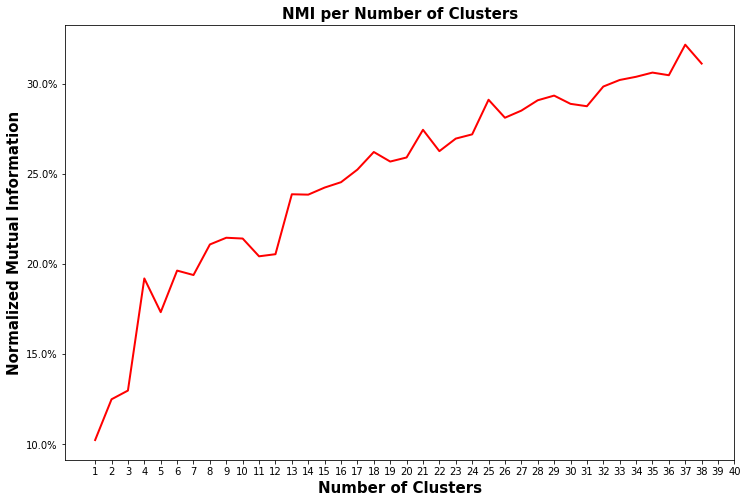

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nmi_list_res, color='r', linewidth=2)
_ = ax.set_xticks(list(range(40)))
_ = ax.set_xticklabels(list(range(1,41)))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
_ = ax.set_ylabel("Normalized Mutual Information", weight = "bold", size=15)
_ = ax.set_xlabel("Number of Clusters", weight = "bold", size=15)
_ = ax.set_title("NMI per Number of Clusters", weight = "bold", size=15)

We observe that here a much more smooth NMI plot when compared to the erratic NMI plot using the normal KMeans. We can see that the maximum value of NMI is more than 30% for around 37 clusters, which is also 10% better than the normal KMeans. Therefore we choose the optimal number of clusters to be 37.

In [ ]:
k = nmi_list_res.index(max(nmi_list_res))+1
k

37

### Comparison

We will plot the NMI per number of clusters for both models we created.

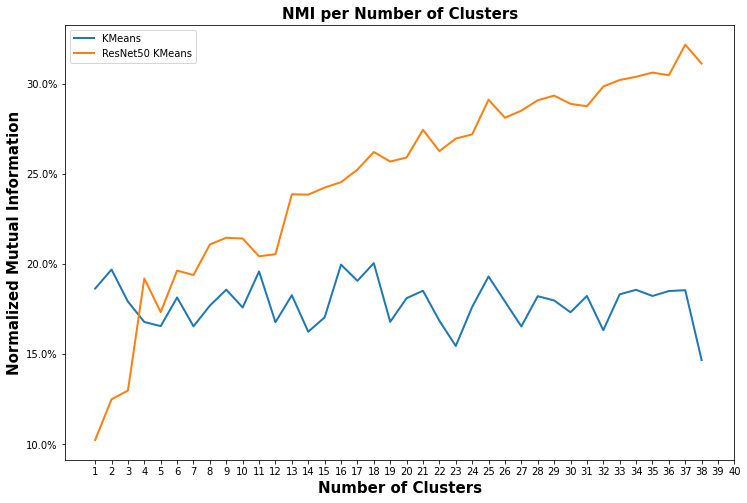

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nmi_list, linewidth=2, label='KMeans')
ax.plot(nmi_list_res, linewidth=2, label='ResNet50 KMeans')
_ = ax.set_xticks(list(range(40)))
_ = ax.set_xticklabels(list(range(1,41)))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
_ = ax.set_ylabel("Normalized Mutual Information", weight = "bold", size=15)
_ = ax.set_xlabel("Number of Clusters", weight = "bold", size=15)
_ = ax.set_title("NMI per Number of Clusters", weight = "bold", size=15)
plt.legend()
plt.savefig("nmi_per_cluster_char")

Here the smoothness of the ResNet50 KMeans curve is obvious relative to the erratic KMeans curve. We also see that for a relatively small number of clusters the normal KMeans performs better based on NMI but it quickly becomes worse than the ResNet50 which continues to rise in, one might say, a logarithmic type of curve.
For this reason, the KMeans where we extracted the features of the images using ResNet50 is much better and should therefore be used.

## Clustering Based on Century

### K-Means

The setup here is almost identical to the setup for K-Means Clustering based on Character, the only difference being that since our ground truth for this problem is the century column of ds1, we will get our data from `ds1` instead of `dsf1`.

In [ ]:
#getting the images
X = ds1['flat_norm'].to_numpy()
X = np.stack(X)

In [ ]:
#getting the century of each image
y = ds1.century.to_numpy()
y = np.stack(y) 

Now, we will split our data, again in the same way as always before.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=39)

We will now check all the different values that century can take and save this to a new variable.

In [ ]:
n_centuries = len(np.unique(y_train))
print(n_centuries)

3


We will now perform K-Means on our data in the same way as before, but now the number of clusters will range from 1 to 15. This is a meaningful number of clusters because, even though we don't have the data to support it, the model could detect the similarities between an even smaller number of years than a century (in this case 20 years per cluster).

In [ ]:
clusters = range(1,16)
nmi_list_cent = []

for n_clusters in clusters:
    kmeans = MiniBatchKMeans(n_clusters=n_centuries)
    kmeans.fit(X_train)
    
    clusters = kmeans.fit_predict(X_train)
    cluster_labels = get_reference_dict(clusters, y_train)
    predicted_labels = get_labels(clusters, cluster_labels)

    nmi = normalized_mutual_info_score(y_train, predicted_labels)
    nmi_list_cent.append(nmi)

Let's plot the Normalized Mutual Information Score and check how does it change according to the number of clusters that were created.

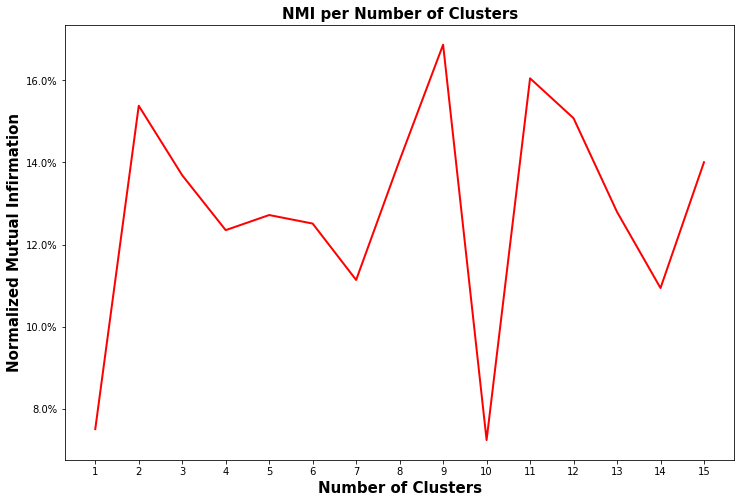

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nmi_list_cent, color='r', linewidth=2)
_ = ax.set_xticks(list(range(15)))
_ = ax.set_xticklabels(list(range(1,16)))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
_ = ax.set_ylabel("Normalized Mutual Infirmation", weight = "bold", size=15)
_ = ax.set_xlabel("Number of Clusters", weight = "bold", size=15)
_ = ax.set_title("NMI per Number of Clusters", weight = "bold", size=15)

We observe that here the maximum value of the NMI is around 17% for 9 clusters which is what we will choose as our optimum k.

In [ ]:
k = nmi_list_cent.index(max(nmi_list_cent))+1
k

9

### K-Means with ResNet50 Feature Extraction

We will now use the pre-trained Convolutional Neural Network [ResNet50](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50) to extract the features from our images and then perform KMeans on these based on the century they came from. We adapted the code from this [site](https://github.com/r-sajal/DeepLearning-/blob/master/ComputerVision/k-means-blog-tutorial.ipynb) to our own special case.



Now, we will create the `ResNet50` part of our model, where the `input_shape` is chosen to be the rgb images we have on the `image_characters` folder, but reshaped as 32x32 images, which is the same as before for the character.

In [ ]:
model =   keras.applications.ResNet50(weights='imagenet', 
                                      include_top=False, 
                                      input_shape=(32, 32, 3))

94765736/94765736 [==============================] - 1s 0us/step


As before, we will use the [cv2](https://opencv.org/) library of python to read the images to a list.

In [ ]:
#creating the lists that will hold our data
data = []
label = []
path = "/content/image_characters/"   #the path to our photos
IMG_SIZE = 32   #the size that our images will be transformed to

for file in os.listdir(path):
  '''
  because some photos had NaN values as character and we have already dropped 
  them, we will check if the photo that is read from the path exists on the ds1
  dataframe where we have dropped the NaN values. If it doesn't, the code proceeds
  to the next photo. 
  '''
  if file in ds1.name.value_counts().index:
    img=cv2.imread(path+file)   #reading the photo
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))   #resizing it
    img=img.astype('float32')   #transforming the integers to floats
    
    #saving each photo's label (as ord(letter)) to the list
    l = ds1[ds1.name==file].ord.to_numpy()    
    label.append(l)
    data.append(img)
  else:
    continue
data = np.array(data)

We will now extract the features of each image we saved using this function.

In [ ]:
def extract_vector(data_holder):

    resnet_feature_list = []

    for im in data_holder:

        im = img_to_array(im) 

        img = preprocess_input(np.expand_dims(im.copy(), axis=0))

        resnet_feature = model.predict(img)

        resnet_feature_np = np.array(resnet_feature)

        resnet_feature_list.append(resnet_feature_np.flatten())

    return np.array(resnet_feature_list)

In [ ]:
#extracting the features
array = extract_vector(data)

1/1 [==============================] - 0s 46ms/step


The same issue that we had before with each and every one of the columns of the original dataframes when transformed to `numpy` arrays will also exist here for the century that each image's text came from. So, will apply the same solution.

In [ ]:
label = np.array(label)
label = np.stack(label)
label = label.flatten()

We are now finally ready to perform the KMeans algorithm for the century.

In [ ]:
clusters = range(1,16)
nmi_list_cent_res = []

for n_clusters in clusters:
    

    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=39)
    kmeans.fit(array)
    clusters = kmeans.fit_predict(array)
    
    nmi = normalized_mutual_info_score(label, kmeans.labels_)
    nmi_list_cent_res.append(nmi)
    
    
    try:
      cluster_labels = get_reference_dict(clusters, label)
      predicted_labels = get_labels(clusters, cluster_labels)
    except ValueError:
      continue

Let's plot the NMI per number of clusters. 

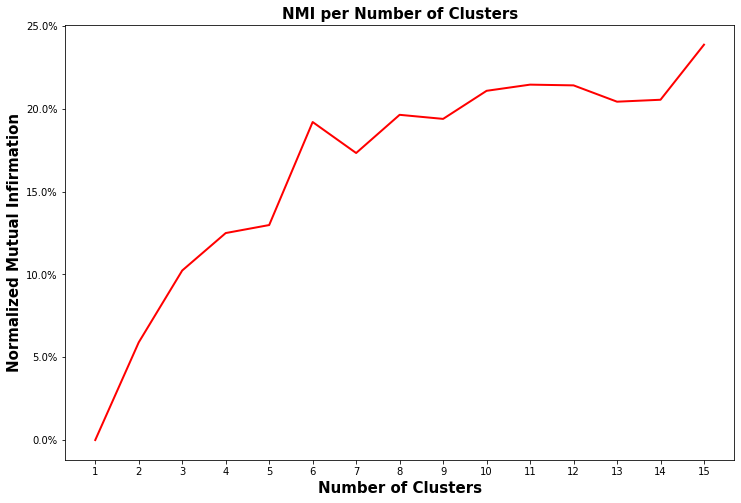

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nmi_list_cent_res, color='r', linewidth=2)
_ = ax.set_xticks(list(range(15)))
_ = ax.set_xticklabels(list(range(1,16)))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
_ = ax.set_ylabel("Normalized Mutual Infirmation", weight = "bold", size=15)
_ = ax.set_xlabel("Number of Clusters", weight = "bold", size=15)
_ = ax.set_title("NMI per Number of Clusters", weight = "bold", size=15)

We observe that the maximum value of the NMI is achieved for 15 clusters, which is just one more than the one we reported for the normal KMeans. Also the said maximum value of NMI is just below 25%, which is a lot higher than the almost 19% from the normal KMeans.

Therefore, for this specific model, the optimal number of clusters is 15.

In [ ]:
k = nmi_list_cent_res.index(max(nmi_list_cent_res))+1
k

15

### Comparison

Let's plot the NMI per cluster for both of the models we used and compare them.

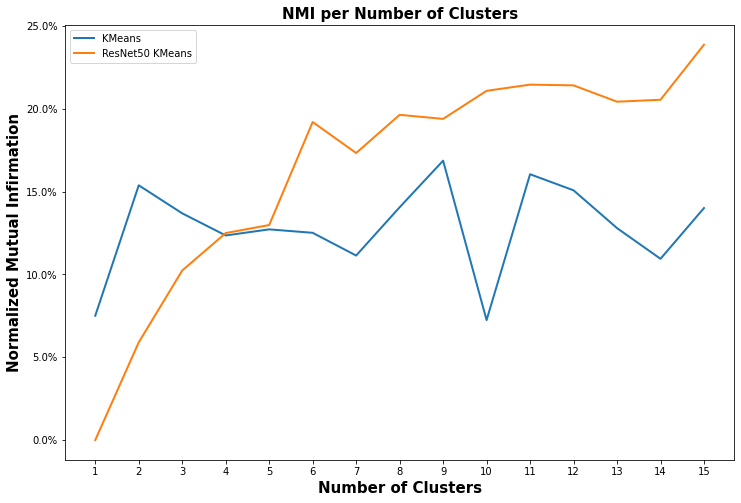

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nmi_list_cent, linewidth=2, label="KMeans")
ax.plot(nmi_list_cent_res, linewidth=2, label = "ResNet50 KMeans")
_ = ax.set_xticks(list(range(15)))
_ = ax.set_xticklabels(list(range(1,16)))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
_ = ax.set_ylabel("Normalized Mutual Infirmation", weight = "bold", size=15)
_ = ax.set_xlabel("Number of Clusters", weight = "bold", size=15)
_ = ax.set_title("NMI per Number of Clusters", weight = "bold", size=15)
plt.legend()
plt.savefig("nmi_per_cluster_cent")

Here we observe the same thing we observed on the comparison plot for the character clustering. For small number of clusters the NMI of KMeans is actually bigger than the ResNet50 one, but ResNet50 quickly takes the lead and continues to increace in a smooth curve that is reminiscent of the logarithmic curve, while KMeans continues its erratic pattern for more and more clusters.

## General Notes in Part 4

The same problem we addressed in Part 3 is also present here and the same assumption we made is also made for this problem. 

But what we want to address here is the low values of NMI on all of these models. We think that this is the result of the curse of dimensionality we have a sample size of about 1000 and some 784 features for each observation of our sample. This is leands to a very low score of the proportion of $\frac{sample\:size}{features}$ which, in general, needs to be as high as possible. Therefore, whatever method we use, the clustering will not be optimal in any way, shape or form.

# Part 5
* Cluster the images of the second dataset __per character__, selecting the optimum K per character by using the Davies Bouldin criterion (note: it does not require any ground truth). Show images per cluster per character. Qualitatively assess your clustering (per character) based on this visualisation. 

Hint: You can ignore rare characters. 

In order to classify these images per character we will take a different approach. We will use a package called [Clustimage](https://erdogant.github.io/clustimage/pages/html/core_functions.html#import-data) and approach the problem as shown on this [site](https://towardsdatascience.com/a-step-by-step-guide-for-clustering-images-4b45f9906128).

Since this package is not available on Google Colab, we need to install it using `pip`.

In [ ]:
#installing the package Clustimage
!pip install Clustimage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.9 MB/s 
     |████████████████████████████████| 296 kB 38.4 MB/s 
     |████████████████████████████████| 1.1 MB 42.4 MB/s 
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=05b43ae09707c932f5c198a9f74b978f587cab0d10e8f8110b55fae293b44d5e
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=3b9cb1ac9fadffaf5a9a4c3bb1f0e2aa3a373c98e7f31474a945fc5a300848d8
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=714b0a329b347ec70fa322ed3fca097e2e56ecdb447967aa658128479260dfbe
  Stored in directory: /root/.cache/pip/wheel

Let's import it

In [ ]:
from clustimage import Clustimage
import matplotlib.pyplot as plt

Since we need to cluster per character, we will create a deep copy of the ds2 dataframe so that we will not mess with the original one, if there is the need to use it again. We will do this with the [copy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html) command of `pandas`.

In [ ]:
#creating a copy of ds2 that any changes applied to ds22 won't
#change ds2
ds22 = ds2.copy(deep=True)

Now, the solution to our complex problem here is to just change the index of ds22 with the new index obviously being the `character` column. To do this, we will use the [set_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html) command from `pandas`.

In [ ]:
#setting the character column of ds22 to be the new index
ds22 = ds22.set_index(['character'])

Before we create the clustering models, we will save in a list all the unique characters by applying the [unique](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) command to the column character of ds2 this time, not ds22 (this wouldn't work as character is the index of ds22 and we can't get all the unique indexes of a dataframe)

In [ ]:
#finding all the unique characters from the second dataset
characters = ds2.character.unique()

Now we are finally ready to perform the clustering. Some details that need to be addressed. The model performs some dimensionality reduction using the PCA method (which was also shown in class [here](https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/)). We also changed the dimensions of each image from 28x28 to 128x128 and keeping the third dimension of each image so that we can use the color as an extra helping hand to perform the clustering. Now, as for the fit of each characters images to the clustering model, we used a different clustering method than KMeans which we used in Part 4, called [agglomerative clustering](https://towardsdatascience.com/breaking-down-the-agglomerative-clustering-process-1c367f74c7c2) in hopes that it will give us some better results than KMeans did in Part 4. 
The Davies Bouldin criterion was added to the fitting of the model to our data each time in the form of the arguement `evaluate = 'dbindex'` which, according to the documentation of the library, [dbindex](https://erdogant.github.io/clustimage/pages/html/Cluster%20Evaluation.html#dbindex) is the Davies Bouldin Index, which we want. Finally, we chose to search for the optimal k to be in the range of 3 to 9 clusters, as even 9 should be a more than adequate number of clusters to find all the differences between any given letter.

In [ ]:
%%capture
#creating a dictionary that holds each character and the optimum k that was 
#calculated using the Davies Bouldin criterion
opt_k = {}

#a dictionary that holds the cluster model for each character
#this will help us later with the visualization
res = {}

'''
To do what is asked we will iterate through the character list, creating each time 
a clustering model with minimum 3 and maximum 9 clusters. The clusters returned 
will be based on the Davis Bouldin criterion
'''
for char in characters:
  #getting the flattened normalized version of the image and casting it to a 
  #numpy array, which has the known problem known from part 3
  X = ds22.loc[char].flat_norm.to_numpy()
  X = np.stack(X)   #how we solve the known problem
  
  #creating the model of clustering
  cl = Clustimage(method='pca',
                embedding='tsne',
                grayscale=False,
                dim=(128,128),
                params_pca={'n_components':0.95})
  
  #fitting it to the data of each character
  results = cl.fit_transform(X,
                           cluster='agglomerative',
                           evaluate='dbindex',
                           metric='euclidean',
                           linkage='ward',
                           min_clust=3,
                           max_clust=10,
                           cluster_space='low')
  
  #saving the model so that we can use it again for the visualization part
  res[char] = cl

  #getting the optimum k as the length of the labels that were created 
  #and then saving it to the dictionary
  k = len(np.unique(cl.results['labels']))
  opt_k[char] = k

  

Now that we performe the clustering per character, let's see the optimum k chosen by our model each time using the Davies Bouldin Index.

In [ ]:
opt_k

{'η': 9,
 'ι': 9,
 'γ': 9,
 'ο': 9,
 'θ': 9,
 'π': 9,
 'κ': 9,
 'δ': 8,
 'ω': 3,
 'ε': 9,
 'λ': 9,
 'χ': 9,
 'φ': 9,
 'ϲ': 8,
 'ρ': 9,
 'ν': 9,
 'μ': 9,
 'υ': 9,
 'τ': 9,
 'α': 9}

All that's left to do is to print an image per cluster per character so that we verify and evaluate the clustering. To do this, we will use all the models that we saved before and plot a single image per cluster using the `plot_unique` command.

Image per cluster for  η


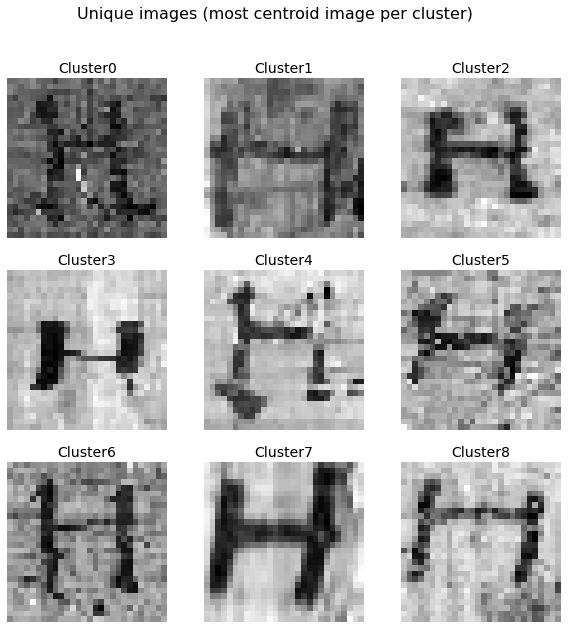

Image per cluster for  ι


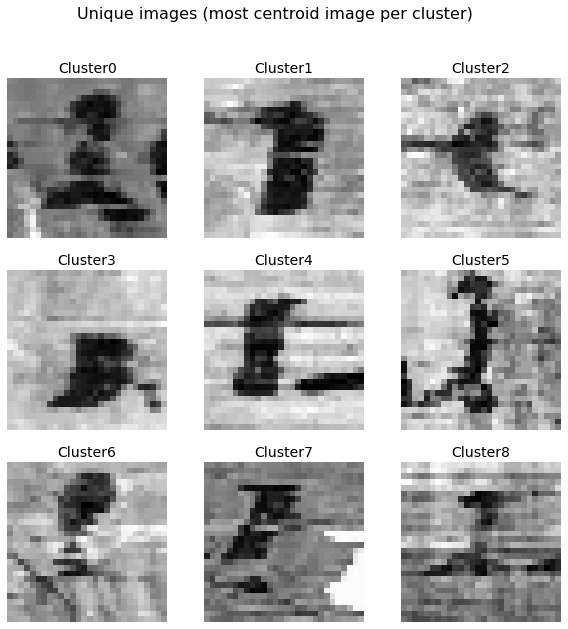

Image per cluster for  γ


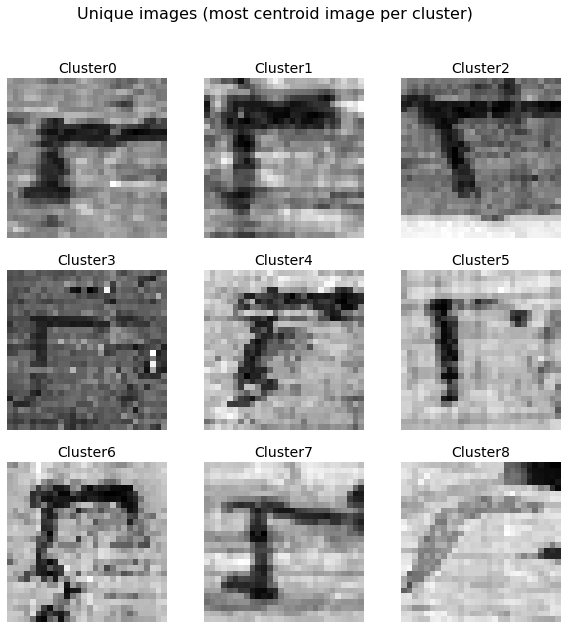

Image per cluster for  ο


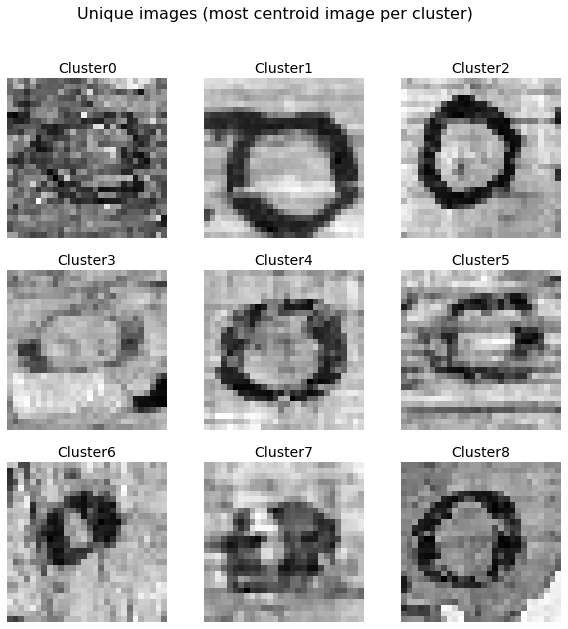

Image per cluster for  θ


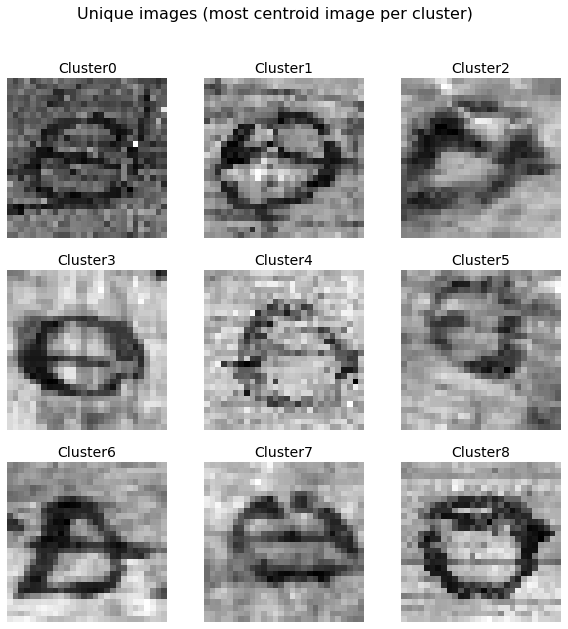

Image per cluster for  π


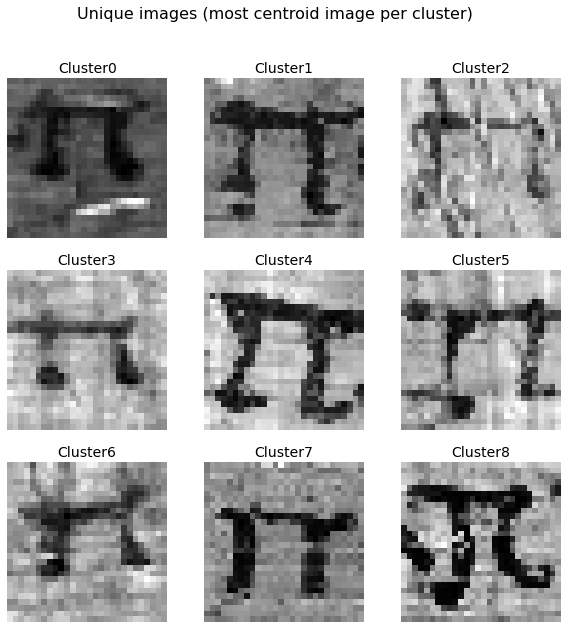

Image per cluster for  κ


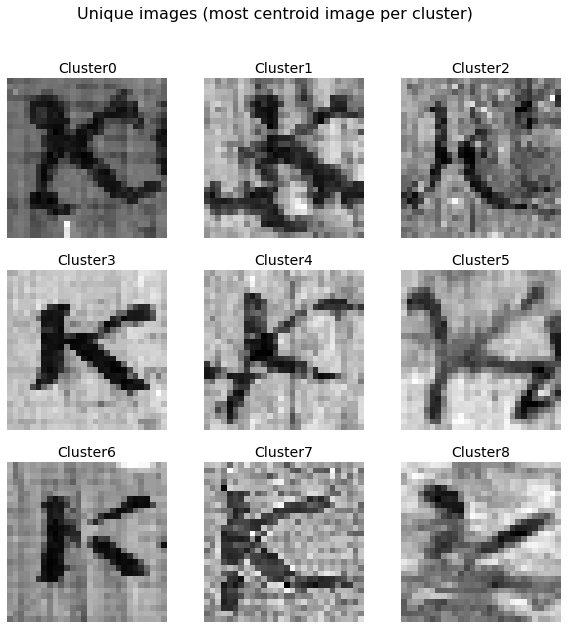

Image per cluster for  δ


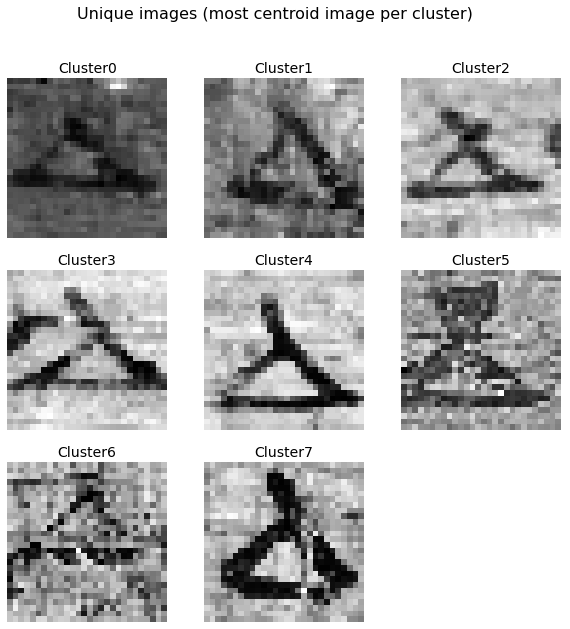

Image per cluster for  ω


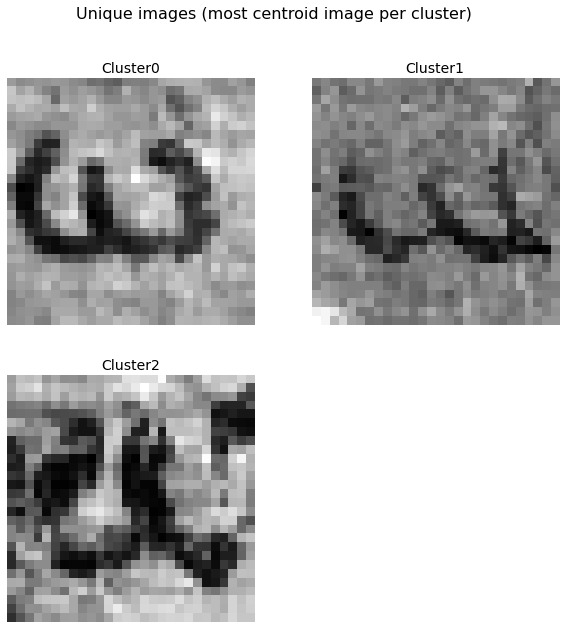

Image per cluster for  ε


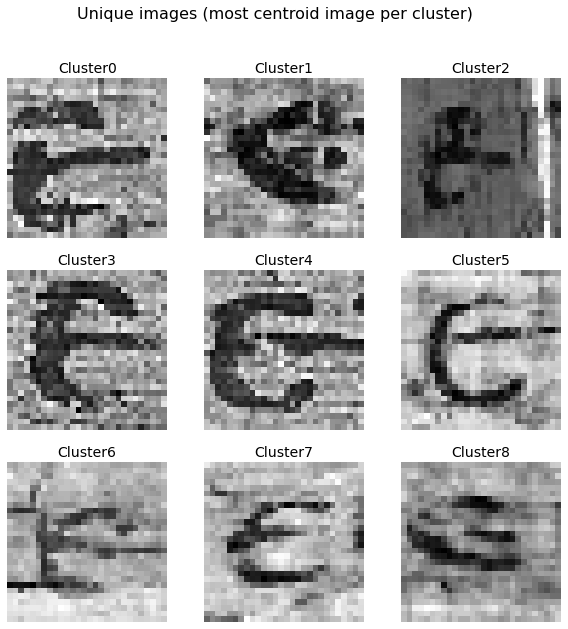

Image per cluster for  λ


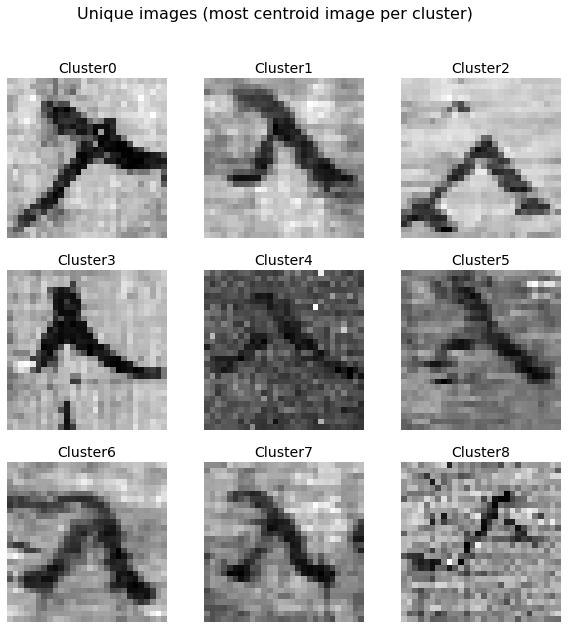

Image per cluster for  χ


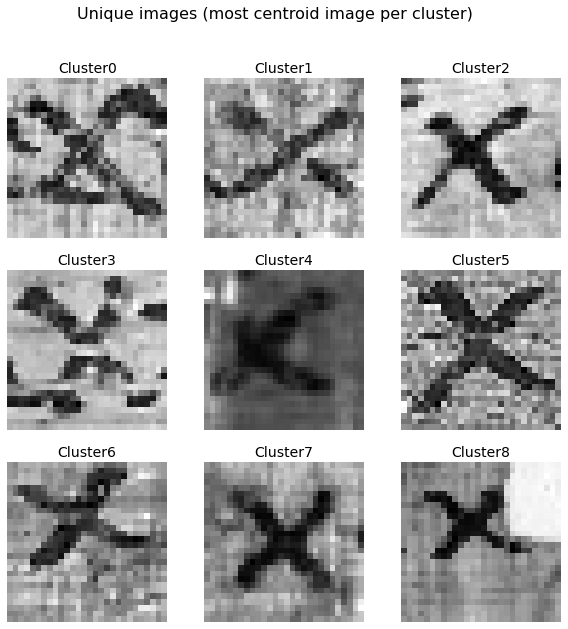

Image per cluster for  φ


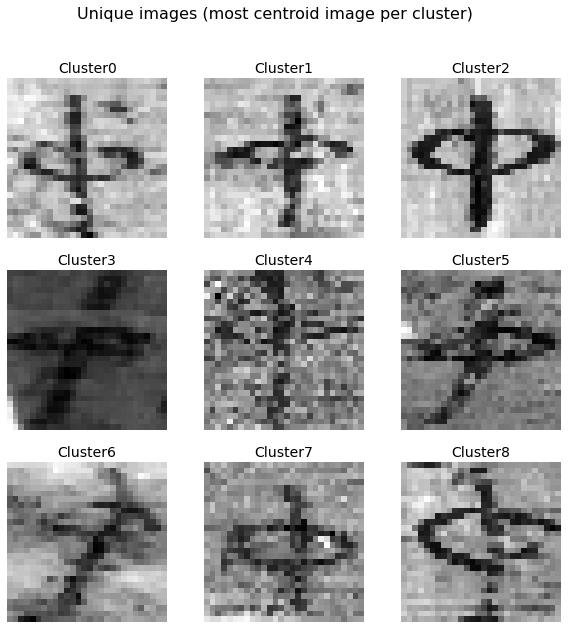

Image per cluster for  ϲ


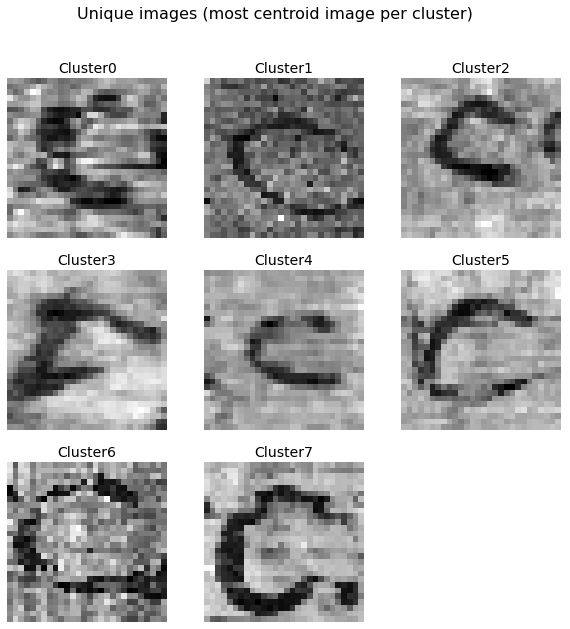

Image per cluster for  ρ


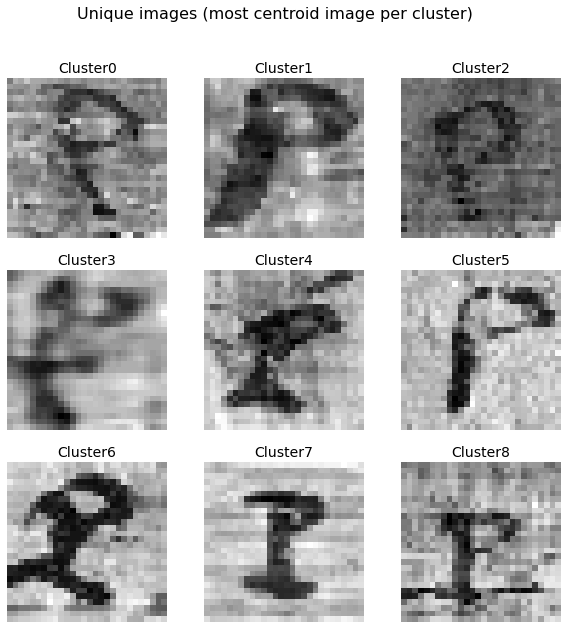

Image per cluster for  ν


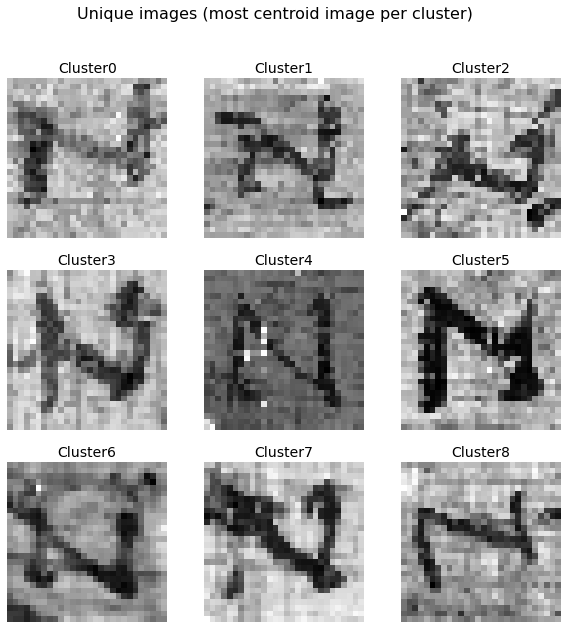

Image per cluster for  μ


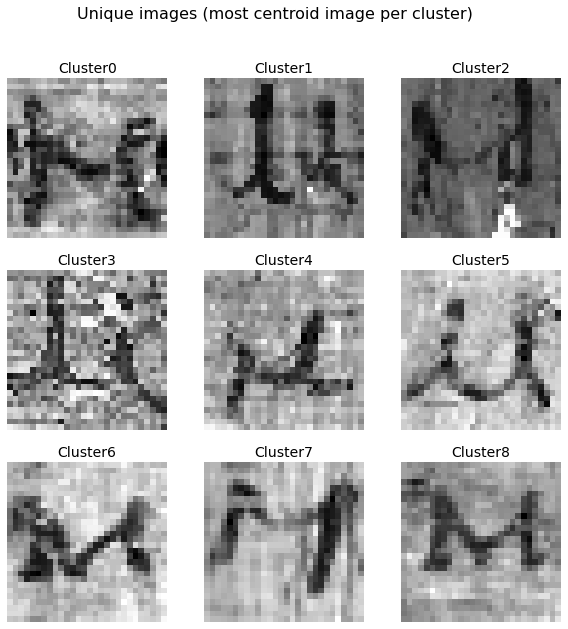

Image per cluster for  υ


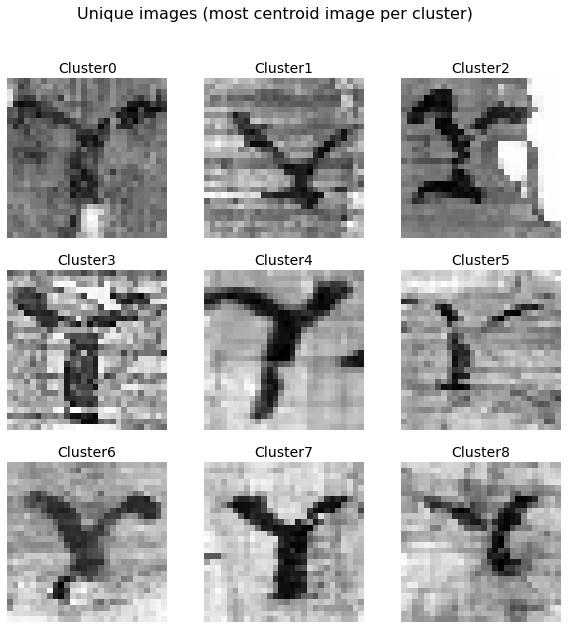

Image per cluster for  τ


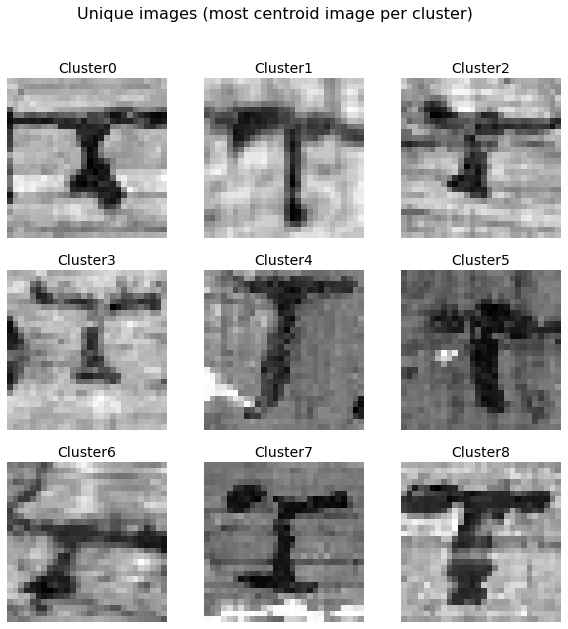

Image per cluster for  α


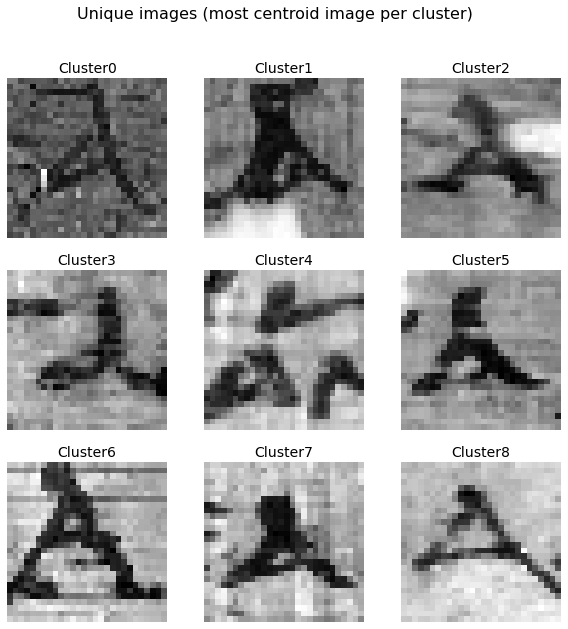

In [ ]:
for r in res.keys():
  print("Image per cluster for ", r)
  res[r].plot_unique(img_mean=False, figsize=(10,10))

By observing the image that we printed for each cluster of each character we see that the clustering was mostly successful. It lacked on some letters that the letters themselves simmply cannot be written in many different  ways (like `ι` and `ο`). Therefore, we consider our clustering per character to be trusted and we deem it to be "good".

## Bonus [5%] 
Use https://scikit-image.org/ for better preprocessing or a pre-trained CNN for feature extraction.